<a href="https://colab.research.google.com/github/abhisheksambyal/Self-supervised-learning-by-context-prediction/blob/master/Self_supervised_learning_by_context_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2020 Abhishek Singh Sambyal, Ashish Kaushal, Poojith U. Rao

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

<!-- #### NOTE:  
1. Don't run the code directly as it requires a lot of training time and dependency.
2. Pretrained models of all the networks trained in this notebook are saved.  
3.  Kindly mail abhishek.19csz0001@iitrpr.ac.in to get the pretrained weights. -->



---


#PROJECT


---



<p style='text-align: center'><h1>A General Purpose Pre-trained Model from the same Input Data</h1></p>

#### [Implementation of "Unsupervised Visual Representation Learning by Context Prediction" by C. Doersh, A. Gupta and A. A. Efros]

<!-- > <p>Abhishek Singh Sambyal (2019csz0001)
> <p>Ashish K. Kaushal (2019csz0003)
> <p>Poojith U. Rao (2019csz0006) -->

#Introduction

><p> Given a task where we have sufficient labeled data, supervised learning methods have shown very promising results and proven to be a competent approach in solving various problems [1]. Efforts have been made to scale-up the use of these methods but sometimes the true cost of labeled data is significantly high. Therefore, considering the enormity of unlabeled data in comparison to the human annotated data, a natural way to handle this problem is using the unsupervised learning approach which aims on using the unlabeled data for performing the task.</p>

><p> Many decades have passed since the origin of unsupervised learning but it hasn’t yet been able to showcase the possessed hidden potential. After all, to know what to do, we must know what to do. For example, if we want to identify an object from an image we must know what the object looks like, what are the properties of that object, and how it is different from other similar objects etc.</p>

><p> In the field of computer vision, many models performing the tasks like semantic segmentation, object detection or object recognition have made significant progress so as to compete with humans on complex visual benchmarks. Unfortunately, the achievement of these models is mainly restricted to the amount of labeled data and also they are customized to specific scenarios. For example, a model trained on an ImageNet dataset to perceive road traffic at daylight might not work impeccably at night [2, 3].</p>

><p> As a result, a significant amount of research is focussing on models which adapt to new environmental conditions without leveraging the usual way of large expensive supervision. This includes advancement in transfer learning, self-supervised learning, semi-supervised learning, domain adaptation or weakly supervised learning. </p>

><p> Luckily, in the domain of text, an automatic supervisory signal for learning representation which we can use is <i>context</i> [4, 5, 6, 7]. If given with a large corpus of text, we can train a model which maps the words of that corpus to a feature vector in such a way that we predict the words which are supposed to occur before or after that specific word. It helps us to convert an unsupervised learning problem to a self-supervised learning one. This context prediction is known as the “pretext task” which provides our model an improved understanding and forces it to learn the word embedding in a substancial way. This improves the accuracy of our model and helps us in solving many real world tasks [6]. When it comes to image data, we can’t use the context as a pretext task in such a plain and straightforward manner. It turns out that there are many pretext tasks available for image data out of which we can choose any of them. Colorization, image patch prediction, classification of corrupt images, inpainting, placing frames in correct order, or image rotation are few among them. Each of the described tasks are state-of-the-art techniques providing significant results depending upon the dataset on which they are applied.</p>

><p> In our work, we aim to provide a self-supervised formulation by predicting the context of patch as a pretext task. In this task, we sample a random pair of patches from 8 patches of an image and try to predict the position of one patch with respect to the other one. We presented an ConvNet based architecture for pair classification and trained our model on a mini-ImageNet dataset.</p>





#Related Work

><p>Self-supervised is a learning framework in which a pretext task is specified for learning the true representations/features in such a way that it will help later in solving the real world downstream tasks. Since it is a generic framework, it can be used in a wide variety of applications like robotics and computer vision.</p>
><p>In robotics, multiple perception modalities and results of interacting with the world are signals which can be used for creation of self-supervised tasks [8, 9, 10]. Similarly, when learning representation from videos, one can use consistency [11] or audio, video and subtitles [12, 13, 14] synchronized cross modality in the temporal dimension.</p>
><p>However, when thinking of an ideal image representation in terms of latent variables of a generative model, we want the model to generate images in their natural distribution and be concise of common causes for different images and share information between them. But the issue of inference with latent structures given an image is highly dubious. To deal with this computational issue, many compositions such as contrastive divergence [15], deep Boltzman machines [16], wake-sleep algorithm [17], variation of Bayesian methods [18, 19] have been proposed. Generative models have high performance on smaller datasets like handwritten digits [15, 16, 18, 19] but do not work well with natural images of high resolution.</p>
><p>In unsupervised representation learning, to learn the embeddings of images in a true sense, one way is to create a supervised pretext task in such a way that the labels are part of input data. In such a case, our model will be able to learn the embeddings from the data itself which will be useful for other real world tasks. For example, denoising autoencoders [20, 21] use reconstruction from noisy data as a pretext task. The algorithm ensured this by identifying the objects in the image and classifying whether the object is a signal or a noise. Sparse autoencoders also use reconstruction as a pretext task along with a sparsity penalty. Such autoencoders are stacked to form deep representations [22, 23].</p>
><p>Another pretext task is “context prediction”. This task has been widely used in the domain of Natural Language Processing where it is applied on text. Skip-gram models [6] have been used to train a model (deep network) to predict, from a single word, the n preceding and n succeeding words which generate useful word representations. Similar motivation can be used in image domain but the problem still persists as we can’t determine whether the predictions are correct [24] or not, unless we care about predicting the low level features [25, 26, 27]. To tackle this issue, [28] designed an approach which predicts the appearance of an image region by voting (consensus) of transitive nearest neighbours surrounding it. The major issues that all these approaches address is that predicting pixels is always harder than predicting text unless we use an unorthodox approach which deals with these issues differently.</p>
<p></p>

# Methodology

In [ ]:
!ls /gdrive/My\ Drive/training_models

model_64_300_0.0001_1000_15_3.pt
model_64_65_0.0005_1000_15_3.pt
model_CA_base_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_colab_300.pt
model_PROJ_base_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, datasets
 
import torchvision
from torchvision import transforms
from torchvision import models
 
import torch.nn.functional as F
import torchvision.transforms.functional as TF
 
import albumentations
 
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import time
import nibabel as nib
from tqdm import tqdm
import pandas as pd

import skimage
from skimage import img_as_ubyte, img_as_float32

from sklearn.model_selection import StratifiedShuffleSplit

from glob import glob

np.random.seed(108)
 
plt.style.use('default')
 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
visualize = False

In [ ]:
class Config():
  ROOT = 'tiny-imagenet-200'
  TRAIN_PATH = 'tiny-imagenet-200/train'
  VAL_PATH = 'tiny-imagenet-200/val'
  TEST_PATH = 'tiny-imagenet-200/test'
  subset_data = 1000
  patch_dim = 15
  gap = 3
  batch_size = 64
  num_epochs = 65
  lr = 0.0005

## Utitily Functions

In [ ]:
def imshow(img,text=None,should_save=False):
    plt.figure(figsize=(10, 10))
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()  

def show_plot(iteration,loss,fname):
    plt.plot(iteration,loss)
    plt.savefig(fname)
    plt.show()

In [ ]:
"""
Args:
    tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
Returns:
    Tensor: Normalized image.
"""
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
# unorm(tensor)

In [ ]:
def convert_format(data, format):
  if format == 'p':
    return np.transpose(data, (0, 3, 1, 2))
  if format == 'n':
    return np.transpose(data, (0, 2, 3, 1))
  if format == '3':
    return np.transpose(data, (1, 2, 0))

# Tiny Imagenet dataset Download

* <b>Dataset Description</b>
> In our experimentation, we used the Tiny ImageNet dataset. It contains 1,00,000 images as training set, 10,000 images as validation set, 10,000 images as test set. The source of images are the 200 different classes of objects. Originally the experiments were to be performed on the training set of ImageNet dataset (consisting of 1.3M images) but due to limited computation power, we decided to perform the task on the former. To further reduce the computation, we performed stratification on the dataset and chose 10 classes out of available 200 classes and then selected 4000 images as our final training set such that the proportion per class remains the same. The images in this dataset are downscaled from the original ImageNet dataset size of 256x256 to 64x64.

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip -q tiny-imagenet-200.zip

--2020-06-07 14:00:35--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  6.50MB/s    in 41s     

2020-06-07 14:01:16 (5.71 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



## Creating Dataset class for Training and Validation

* <b>Generating Patches and Avoiding Trivial Solutions</b>
> In each image for computational efficiency, instead of working on all the patches, we sample the patches in a grid-like structure such that each patch can pair with maximum 8 different patches throughout the image. We sample patches at resolution of 15x15. To ensure that the model does not choose the easy way out using the object boundaries and lines, we left a gap of 3 pixels between two consecutive patches on all patch facing sides. The preprocessing of the patches includes mean subtraction, randomly downsampling the pixels of the some patches and then upsampling them, and projecting and dropping colors. After that, we upsampled the images to 96x96 for further usage.

### Create train csv

In [ ]:
#############################
# Creating training dataset
#############################
df_list = [] 
classes = os.listdir(Config.TRAIN_PATH)
for idx, each_class in enumerate(classes):
  images_in_each_class = glob(f'{Config.TRAIN_PATH}/{each_class}/**/*.JPEG')
  df_list += [[each_image, each_class] for each_image in images_in_each_class]

df = pd.DataFrame(data=df_list, columns=['filename', 'class'])

# Taking the classes subset
num_training_classes_subset = 10
train_classes_used = df['class'].unique()[:num_training_classes_subset]
df = df[df['class'].isin(train_classes_used)]
# df.groupby('class').count()

X, y = df['filename'], df['class']
ratio = Config.subset_data/len(X)
sss = StratifiedShuffleSplit(n_splits=5, train_size=ratio, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    stratified1000trn = train_index
    break

df_trn = df.iloc[stratified1000trn].reset_index(drop=True)
df_trn.head()

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=None,
            train_size=0.2)
TRAIN: 1000 TEST: 4000


filename      class
0  tiny-imagenet-200/train/n03733131/images/n0373...  n03733131
1  tiny-imagenet-200/train/n01644900/images/n0164...  n01644900
2  tiny-imagenet-200/train/n09193705/images/n0919...  n09193705
3  tiny-imagenet-200/train/n03042490/images/n0304...  n03042490
4  tiny-imagenet-200/train/n03670208/images/n0367...  n03670208

In [ ]:
#############################
# Creating validation dataset
#############################

df = pd.read_csv('tiny-imagenet-200/val/val_annotations.txt', 
                       header=None,
                       names=['filename', 'class', '_1', '_2', '_3', '4'], 
                       delim_whitespace=True)
df.drop(['_1', '_2', '_3', '4'], axis = 1, inplace=True)
# Using only those classes in the dataset which are used in the training
df = df[df['class'].isin(train_classes_used)]

X, y = df['filename'], df['class']
sss = StratifiedShuffleSplit(n_splits=5, train_size=0.2, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    stratified1000val = train_index
    break

df_val = df.iloc[stratified1000val].reset_index(drop=True)
df_val['filename'] = 'tiny-imagenet-200/val/images/' + df_val['filename']
df_val[['filename', 'class']].head()

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=None,
            train_size=0.2)
TRAIN: 100 TEST: 400


filename      class
0  tiny-imagenet-200/val/images/val_7821.JPEG  n04285008
1  tiny-imagenet-200/val/images/val_9497.JPEG  n04146614
2   tiny-imagenet-200/val/images/val_659.JPEG  n02841315
3   tiny-imagenet-200/val/images/val_460.JPEG  n09193705
4  tiny-imagenet-200/val/images/val_3840.JPEG  n09193705

### Dataset Class

In [ ]:
#########################################
# This class generates patches for training
#########################################

class MyDataset(Dataset):
  def __init__(self, patch_dim, gap, df, validate, transform=None):
    self.patch_dim, self.gap = patch_dim, gap
    self.transform = transform

    if validate:
      self.train_data = df.values
    else:
      self.train_data = df.values
  
  def get_patch_from_grid(self, image, patch_dim, gap):
    image = np.array(image)

    offset_x, offset_y = image.shape[0] - (patch_dim*3 + gap*2), image.shape[1] - (patch_dim*3 + gap*2)
    start_grid_x, start_grid_y = np.random.randint(0, offset_x), np.random.randint(0, offset_y)
    patch_loc_arr = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 3)]
    loc = np.random.randint(len(patch_loc_arr))
    tempx, tempy = patch_loc_arr[loc]
    
    patch_x_pt = start_grid_x + patch_dim * (tempx-1) + gap * (tempx-1)
    patch_y_pt = start_grid_y + patch_dim * (tempy-1) + gap * (tempy-1)
    random_patch = image[patch_x_pt:patch_x_pt+patch_dim, patch_y_pt:patch_y_pt+patch_dim]

    patch_x_pt = start_grid_x + patch_dim * (2-1) + gap * (2-1)
    patch_y_pt = start_grid_y + patch_dim * (2-1) + gap * (2-1)
    uniform_patch = image[patch_x_pt:patch_x_pt+patch_dim, patch_y_pt:patch_y_pt+patch_dim]
    
    random_patch_label = loc
    
    return uniform_patch, random_patch, random_patch_label

  def __len__(self):
    return len(self.train_data)
  
  def __getitem__(self, index):
    image = Image.open(self.train_data[index]).convert('RGB')
    uniform_patch, random_patch, random_patch_label = self.get_patch_from_grid(image, 
                                                                               self.patch_dim, 
                                                                               self.gap)
    if uniform_patch.shape[0] != 96:
        uniform_patch = skimage.transform.resize(uniform_patch, (96, 96))
        random_patch = skimage.transform.resize(random_patch, (96, 96))
        
        uniform_patch = img_as_float32(uniform_patch)
        random_patch = img_as_float32(random_patch)

    # Dropped color channels 2 and 3 and replaced with gaussian noise(std ~1/100 of the std of the remaining channel)
    uniform_patch[:, :, 1] = np.random.normal(0.485, 0.01 * np.std(uniform_patch[:, :, 0]), (uniform_patch.shape[0],uniform_patch.shape[1]))
    uniform_patch[:, :, 2] = np.random.normal(0.485, 0.01 * np.std(uniform_patch[:, :, 0]), (uniform_patch.shape[0],uniform_patch.shape[1]))
    random_patch[:, :, 1] = np.random.normal(0.485, 0.01 * np.std(random_patch[:, :, 0]), (random_patch.shape[0],random_patch.shape[1]))
    random_patch[:, :, 2] = np.random.normal(0.485, 0.01 * np.std(random_patch[:, :, 0]), (random_patch.shape[0],random_patch.shape[1]))

    random_patch_label = np.array(random_patch_label).astype(np.int64)
        
    if self.transform:
      uniform_patch = self.transform(uniform_patch)
      random_patch = self.transform(random_patch)

    return uniform_patch, random_patch, random_patch_label



##################################################
# Creating Train/Validation dataset and dataloader
##################################################

traindataset = MyDataset(Config.patch_dim, Config.gap, df_trn['filename'], False,
                         transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                  std=[0.229, 0.224, 0.225])]))
trainloader = torch.utils.data.DataLoader(traindataset, 
                                          batch_size=Config.batch_size,
                                          shuffle=True,
                                          # num_workers=Config.num_workers
                                          )


valdataset = MyDataset(Config.patch_dim, Config.gap, df_val['filename'], True,
                         transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                  std=[0.229, 0.224, 0.225])]))
valloader = torch.utils.data.DataLoader(valdataset,
                                        batch_size=Config.batch_size,
                                        shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


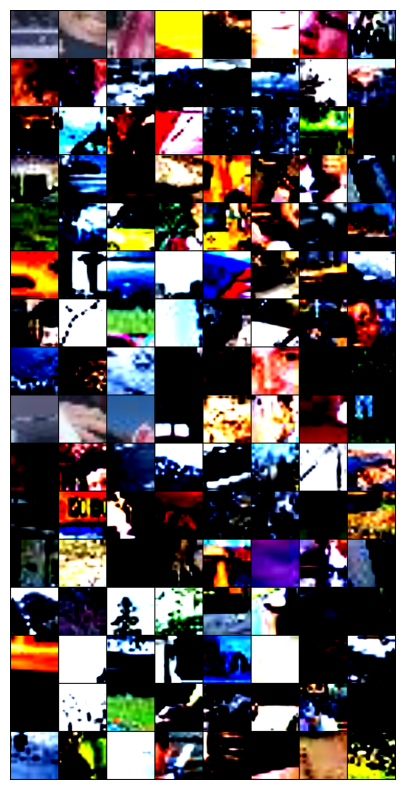

Labels: [0 3 1 1 1 5 6 6 2 1 5 4 4 0 4 3 4 1 1 5 5 7 7 7 3 0 4 5 1 0 3 6 1 5 0 0 6
 6 6 5 5 3 6 6 1 2 6 3 5 1 4 5 3 2 4 7 7 4 1 2 3 1 6 5]


In [ ]:
##############################
# Visualizing training dataset
##############################

example_batch = next(iter(trainloader))
concatenated = torch.cat((unorm(example_batch[0]),unorm(example_batch[1])),0)
imshow(torchvision.utils.make_grid(concatenated))
print(f'Labels: {example_batch[2].numpy()}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


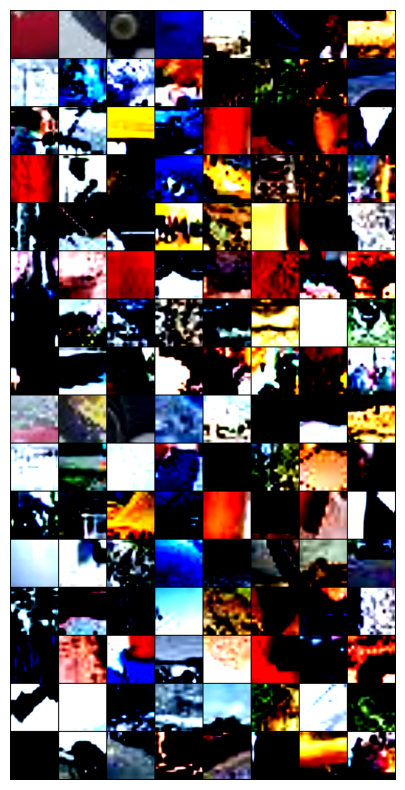

Labels: [1 4 3 5 4 6 4 6 4 3 7 4 7 0 0 7 5 1 2 5 6 4 5 5 5 3 3 4 7 5 0 5 7 3 2 0 4
 7 7 6 6 4 5 1 6 2 3 3 5 1 4 2 1 3 6 1 6 6 7 7 7 6 5 3]


In [ ]:
##############################
# Visualizing validation dataset
##############################

example_batch_val = next(iter(valloader))
concatenated = torch.cat((unorm(example_batch_val[0]),unorm(example_batch_val[1])),0)
imshow(torchvision.utils.make_grid(concatenated))
print(f'Labels: {example_batch_val[2].numpy()}')

### Model for learning patch position

* <b>Learning Context Prediction</b>
> For our pretext task of predicting the relative position of patches, we aim to learn the image representation suitably. We tend to use Convolution Neural Networks (ConvNets) which are well known for their complex image representation with only essential human design. Out of the generated 9 patches from an image, we choose 2 patches in such a way that the 1st chosen patch is always the middle one and the 2nd can be any of the other 8 spatial configurations. Building the ConvNet which predicts the relative position of the 2nd patch with respect to the 1st one requires feeding the two selected patches as input through multiple convolution layers and producing an output that assigns probability to each of the remaining eight patches (softmax output). We ultimately want individual patches to learn the feature embeddings in such a way that patches across different images which are visually similar to the patch remain close in the embedding space. For this, we use an AlexNet-style late-fusion architecture which processes the patch individually until it reaches the depth analogous to fc6 in AlexNet. After this layer the two patches are fused and then processed together. For the layers processing the single patch, weights are tied between both sides of the network such that for both the patches compute the same fc6-level embedding function. As only two layers can receive input from both the patches, the capacity for joint reasoning is very limited. Due to this, the network is expected to perform the bulk semantic reasoning individually.

In [ ]:
class AlexNetwork(nn.Module):
  def __init__(self,aux_logits = False):
      super(AlexNetwork, self).__init__()
      self.cnn = nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LocalResponseNorm(96),
        
        nn.Conv2d(96, 384, kernel_size=5, stride = 2,padding = 2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LocalResponseNorm(384),
        
        nn.Conv2d(384, 384, kernel_size=3, stride=1,padding = 1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(384),
        
        nn.Conv2d(384, 384, kernel_size=3, stride=1,padding = 1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(384),
        
        nn.Conv2d(384, 256, kernel_size=3, stride=1,padding = 1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(256),
        nn.MaxPool2d(kernel_size=3, stride=2,padding = 1),
      )
      self.fc6 = nn.Sequential(
        nn.Linear(256,4096),
        nn.ReLU(inplace=True),
        nn.BatchNorm1d(4096),
      )
      self.fc = nn.Sequential(
        nn.Linear(2*4096,4096),
        nn.ReLU(inplace=True),

        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),

        nn.Linear(4096, 8)
      )

  def forward_once(self, x):
    output= self.cnn(x)
    output = output.view(output.size()[0], -1)
    output = self.fc6(output)
    return output


  def forward(self, uniform_patch, random_patch):
    output_fc6_uniform = self.forward_once(uniform_patch)
    output_fc6_random = self.forward_once(random_patch)
    output = torch.cat((output_fc6_uniform,output_fc6_random), 1)
    output = self.fc(output)
    return output, output_fc6_uniform, output_fc6_random

model = AlexNetwork().to(device)

### Training-Validation Engine

In [ ]:
#############################################
# Initialized Optimizer, criterion, scheduler
#############################################

optimizer = optim.Adam(model.parameters(), lr=Config.lr)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                           mode='min',
                                           patience=5,
                                           factor=0.3, verbose=True)

In [ ]:
############################
# Training/Validation Engine
############################

global_trn_loss = []
global_val_loss = []
# previous_val_loss = 100

for epoch in range(Config.num_epochs):
    train_running_loss = []
    val_running_loss = []
    start_time = time.time()
    model.train()
    for idx, data in tqdm(enumerate(trainloader), total=int(len(traindataset)/Config.batch_size)):
        uniform_patch, random_patch, random_patch_label = data[0].to(device), data[1].to(device), data[2].to(device)
        optimizer.zero_grad()
        output, output_fc6_uniform, output_fc6_random = model(uniform_patch, random_patch)
        loss = criterion(output, random_patch_label)
        loss.backward()
        optimizer.step()
        
        train_running_loss.append(loss.item())
    else:
      correct = 0
      total = 0
      model.eval()
      with torch.no_grad():
        for idx, data in tqdm(enumerate(valloader), total=int(len(valdataset)/Config.batch_size)):
          uniform_patch, random_patch, random_patch_label = data[0].to(device), data[1].to(device), data[2].to(device)
          output, output_fc6_uniform, output_fc6_random = model(uniform_patch, random_patch)
          loss = criterion(output, random_patch_label)
          val_running_loss.append(loss.item())
        
          _, predicted = torch.max(output.data, 1)
          total += random_patch_label.size(0)
          correct += (predicted == random_patch_label).sum()
        print('Val Progress --- total:{}, correct:{}'.format(total, correct.item()))
        print('Val Accuracy of the network on the 10000 test images: {}%'.format(100 * correct / total))

    global_trn_loss.append(sum(train_running_loss) / len(train_running_loss))
    global_val_loss.append(sum(val_running_loss) / len(val_running_loss))

    scheduler.step(global_val_loss[-1])

    print('Epoch [{}/{}], TRNLoss:{:.4f}, VALLoss:{:.4f}, Time:{:.2f}'.format(
        epoch + 1, Config.num_epochs, global_trn_loss[-1], global_val_loss[-1],
        (time.time() - start_time) / 60))
    
    if epoch % 20 == 0:
      MODEL_SAVE_PATH = f'/gdrive/My Drive/model_{Config.batch_size}_{Config.num_epochs}_{Config.lr}_{Config.subset_data}_{Config.patch_dim}_{Config.gap}.pt'
      torch.save(
        {
            'epoch': Config.num_epochs,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'global_trnloss': global_trn_loss,
            'global_valloss': global_val_loss
        }, MODEL_SAVE_PATH)

### Plots

In [ ]:
checkpoint = torch.load('/gdrive/My Drive/training_models/model_colab_300.pt', map_location='cuda')

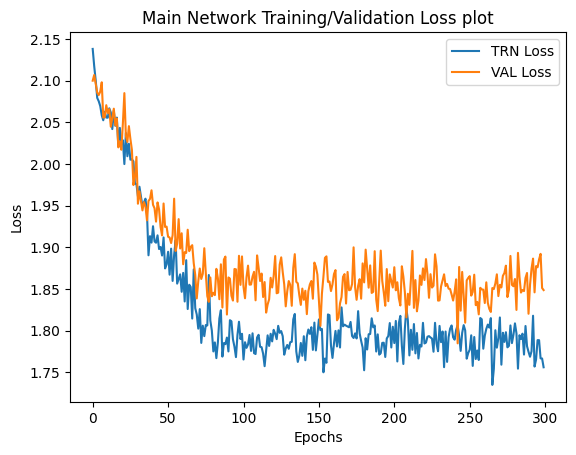

In [ ]:
plt.plot(range(len(checkpoint['global_trnloss'])), checkpoint['global_trnloss'], label='TRN Loss')
plt.plot(range(len(checkpoint['global_valloss'])), checkpoint['global_valloss'], label='VAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Main Network Training/Validation Loss plot')
plt.legend()
plt.show()

# Experiments

## Nearest Neighbor

* <b>Experimentation with Nearest Neighbour</b>
> To demonstrate how well the network learned semantic association with the visually similar patches of different images, we will use nearest-neighbour matching. As our intuition tells that the training should be convenient enough to provide similar representations to semantically similar patches. Therefore, our goal is to understand which of the following patches our network considers as similar. Initially we will randomly sample 96x96 patches of image which will be represented using fc6 features (and removing fc7 and higher layer features). Instead of using two stacks of features, we will use only one. By using the normalized correlations of these features, we will find the nearest neighbour. To comprehend the performance of this experiment, we compared our model with the fc7 features of AlexNet trained on ImageNet dataset using fc6 features from our architecture with random weight initialization. The result showed that the matches returned by our features captures the semantic information that we are after, which is similar to the semantic information captured by the AlexNet (in some cases). Interestingly, random weight initialization in ConvNet also does a pretty reasonable job.

### Loading Saved Model

In [ ]:
!ls /gdrive/My\ Drive

'Colab Notebooks'
 model_64_300_0.0001_1000_15_3.pt
 model_CA_bs64_epochs300_lr0.0005_sd1000_pd15_g3.pt
 model_CA_bs64_epochs300_lr0.01_sd1000_pd15_g3.pt
 model_colab_300.pt
 model_lr0.0005_Adam_epochs300
'Trends in Medical Imaging.gdoc'


In [ ]:
# checkpoint = torch.load('/gdrive/My Drive/model_lr0.0005_Adam_epochs300', map_location='cuda')
# model.load_state_dict(checkpoint['model_state_dict'])

# checkpoint = torch.load('/gdrive/My Drive/training_models/model_64_300_0.0001_1000_15_3.pt', map_location='cuda')
# model.load_state_dict(checkpoint['model_state_dict'])

checkpoint = torch.load('/gdrive/My Drive/training_models/model_colab_300.pt', map_location='cuda')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

### Plotting Results of Nearest Neighbors Experiment

In [ ]:
!ls /gdrive/My\ Drive/training_models

model_64_65_0.0005_1000_15_3.pt
model_CA_base_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_colab_300.pt
model_PROJ_base_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt


In [ ]:
checkpoint = torch.load('/gdrive/My Drive/training_models/model_64_300_0.0001_1000_15_3.pt', map_location='cuda')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
model.eval()

data_iter_1 = iter(valloader)
data_iter_2 = iter(valloader)

example_batch = next(data_iter_1)
vectors = []
for j, data in enumerate(trainloader,0):
    img0, img1, label = data
    label = label.reshape([-1])
    img0, img1 , label = data[0].to(device), data[1].to(device), data[2].to(device)
    output ,output1,output2= model(img0,img1)
    img1 = img1.cpu().detach().numpy()
    output2 = output2.cpu().detach().numpy()
    for i in range(len(output2)):
        vectors.append([img1[i],output2[i]])

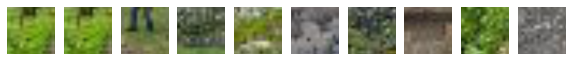

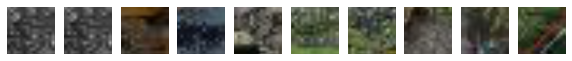

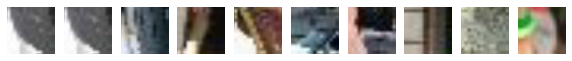

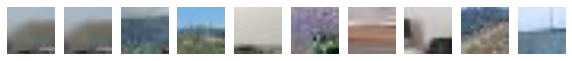

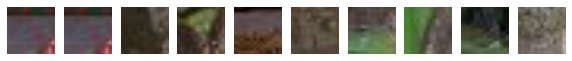

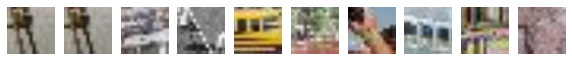

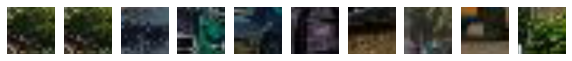

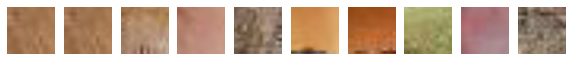

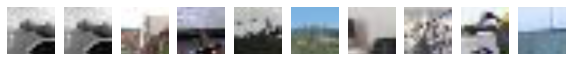

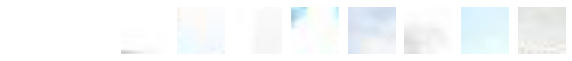

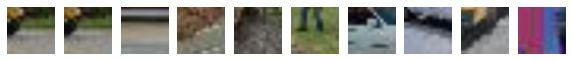

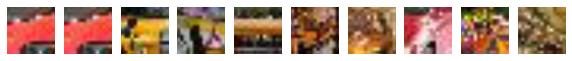

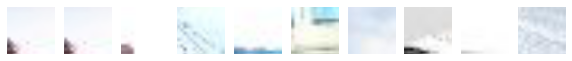

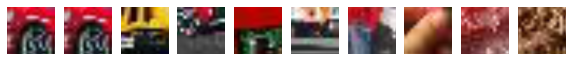

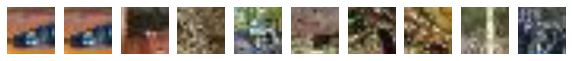

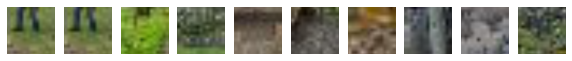

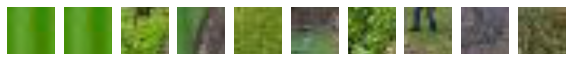

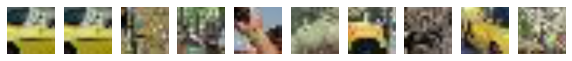

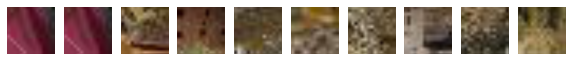

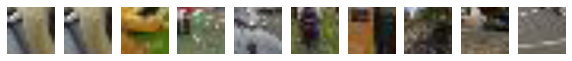

In [ ]:
#model_colab_300.pt

img0 , img1 , label = example_batch
label = label.reshape([-1])
img0, img1 , label = data[0].to(device), data[1].to(device), data[2].to(device)
output ,output1,output2= model(img0,img1)
output2 = output2.cpu().detach().numpy()
img1 = img1.cpu().detach().numpy()

for i in range(20):
    vectors.sort(key=lambda tup: np.linalg.norm(tup[1]-output2[i]))
    npimg = img1[i]
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,10,1)
    plt.axis("off")
    ax1.imshow(np.transpose(unorm(torch.tensor(npimg)), (1, 2, 0)))
    for j in range(1,10):
      ax1 = fig.add_subplot(1,10,j+1)
      ax1.imshow(np.transpose(unorm(torch.tensor(vectors[j-1][0])), (1, 2, 0)))
      plt.axis("off")
    plt.show()

> In the nearest neighbours experiment, we retrieve top k images similar to the input image. In order to do so, we first calculate and store the vector equivalent representations of all the images. Then for a given input image we calculate the euclidean distance to sort the vectors. Top k images are then plotted.

> As we can see the images retrieved from the above method are indeed similar. We can notice that the images obtained follow a trend. The first observation being the color of the images are almost similar. The textures of the images are also similar.

> For example, the first row has leaves in the image and most of the similar images also contain leaves. Similar images of sky also have portions of sky in them. White colored images have similar images with same color.

## Chromatic Aberration

* <b>Experimentation with Chromatic Aberration</b>
> During the early nearest neighbour experimentation, we noticed that some patches retrieved patches from almost the same absolute location (bottom-right) in the image, regardless of the visual similarity or context. This was due to chromatic aberration in the patches. Chromatic Aberration arises when the lens focuses light at different wavelengths which creates the one color channel to focus at a particular position (center) in the image with respect to the other one. It turns out that the designed ConvNet can learn to localize a patch with respect to the lens simply by detecting the color separation between green and magenta. Once the network learns the absolute location of the lens, it uses the trivial solution to find location of the relative patch just by seeing the color when instead, the network should learn the true features of the patch to find the patches similar to it. To demonstrate this phenomenon, we trained a network to predict the absolute (x,y) coordinates of a patch sampled from Tiny Imagenet. The overall accuracy turns out to be reasonably high but it was pretty high for few top images.

### Loading Saved Model

In [ ]:
!ls /gdrive/My\ Drive/training_models

model_64_65_0.0005_1000_15_3.pt
model_CA_base_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_PROJ_base_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt


In [ ]:
checkpoint = torch.load('/gdrive/My Drive/model_lr0.0005_Adam_epochs300', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

### Creating Display Canvas for visualizing patches with (x, y) - coordinates


In [ ]:
def display_canvas(patch_bucket, coordinates, title):
  x = np.linspace(8, 8, 100)
  y = np.cos(x)

  fig, ax = plt.subplots()

  idx = 0
  for i in reversed(range(3)):
    for j in range(0, 9, 3):
      ax.imshow(patch_bucket[idx], extent=[coordinates[i+j][0], 
                                          coordinates[i+j][0]+Config.patch_dim, 
                                          coordinates[i+j][1], 
                                          coordinates[i+j][1]+Config.patch_dim], aspect='auto')
      idx += 1
  ax.plot(x, y)
  plt.title(title)
  plt.show()

# display_canvas(patch_bucket, coordinates)

### Create Chromatic Aberration Training Images Dataframe

In [ ]:
#############################
# Creating training dataset
#############################
Config.subset_data = 950
df_list = [] 
classes = os.listdir(Config.TRAIN_PATH)
for idx, each_class in enumerate(classes):
  images_in_each_class = glob(f'{Config.TRAIN_PATH}/{each_class}/**/*.JPEG')
  df_list += [[each_image, each_class] for each_image in images_in_each_class]

df = pd.DataFrame(data=df_list, columns=['filename', 'class'])

# Taking the classes subset
num_training_classes_subset = 2
train_classes_used = df['class'].unique()[:num_training_classes_subset]
df = df[df['class'].isin(train_classes_used)]

X, y = df['filename'], df['class']
ratio = Config.subset_data/len(X)
sss = StratifiedShuffleSplit(n_splits=5, train_size=ratio, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    stratified1000trn = train_index
    break

df_trn = df.iloc[stratified1000trn].reset_index(drop=True)
df_trn.head()

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=None,
            train_size=0.95)
TRAIN: 950 TEST: 50


filename      class
0  tiny-imagenet-200/train/n01644900/images/n0164...  n01644900
1  tiny-imagenet-200/train/n01644900/images/n0164...  n01644900
2  tiny-imagenet-200/train/n02841315/images/n0284...  n02841315
3  tiny-imagenet-200/train/n02841315/images/n0284...  n02841315
4  tiny-imagenet-200/train/n01644900/images/n0164...  n01644900

In [ ]:
#############################
# Creating validation dataset
#############################

df = pd.read_csv('tiny-imagenet-200/val/val_annotations.txt', 
                       header=None,
                       names=['filename', 'class', '_1', '_2', '_3', '4'], 
                       delim_whitespace=True)
df.drop(['_1', '_2', '_3', '4'], axis = 1, inplace=True)
# Using only those classes in the dataset which are used in the training
df = df[df['class'].isin(train_classes_used)]

X, y = df['filename'], df['class']
sss = StratifiedShuffleSplit(n_splits=5, train_size=0.2, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    stratified1000val = train_index
    break

df_val = df.iloc[stratified1000val].reset_index(drop=True)
df_val['filename'] = 'tiny-imagenet-200/val/images/' + df_val['filename']
df_val[['filename', 'class']].head()

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=None,
            train_size=0.2)
TRAIN: 20 TEST: 80


filename      class
0  tiny-imagenet-200/val/images/val_8151.JPEG  n01644900
1   tiny-imagenet-200/val/images/val_874.JPEG  n01644900
2  tiny-imagenet-200/val/images/val_6840.JPEG  n02841315
3  tiny-imagenet-200/val/images/val_2451.JPEG  n02841315
4  tiny-imagenet-200/val/images/val_4925.JPEG  n01644900

### Create Chromatic Aberration Dataset Class

In [ ]:
####################################
# Chromatic Aberration Dataset Class
####################################

class ChromaticAberrationDataset(Dataset):
  def __init__(self, patch_dim, gap, df, validate, transform=None):
    self.patch_dim, self.gap = patch_dim, gap
    self.transform = transform

    if validate:
      self.train_data = df.values
    else:
      self.train_data = df.values

  
  def get_patches_and_coordinates(self, image, patch_dim, gap):
    patch_loc_arr = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
    patch_coordinates = []
    offset_x, offset_y = image.shape[0] - (patch_dim*3 + gap*2), image.shape[1] - (patch_dim*3 + gap*2)

    start_grid_x, start_grid_y = 9, 9

    patch_bucket = np.empty([9, 3, 96, 96], dtype='float32')

    for i, (tempx, tempy) in enumerate(patch_loc_arr):
        tempx, tempy = patch_loc_arr[i]

        patch_x_pt = start_grid_x + patch_dim * (tempx-1) + gap * (tempx-1)
        patch_y_pt = start_grid_y + patch_dim * (tempy-1) + gap * (tempy-1)

        patch_coordinates.append([patch_x_pt, patch_y_pt])
        img_patch = image[patch_x_pt:patch_x_pt+patch_dim, patch_y_pt:patch_y_pt+patch_dim]

        # Resizing the patch to 96x96
        if img_patch.shape[0] != 96:
          img_patch = skimage.transform.resize(img_patch, (96, 96)) 
          img_patch = img_as_float32(img_patch)

        patch_bucket[i] = np.transpose(img_patch, (2, 0, 1))

    return patch_bucket, np.array(patch_coordinates)

  def __len__(self):
    return len(self.train_data)
  
  def __getitem__(self, index):
    image = np.array(Image.open(self.train_data[index]).convert('RGB'))
    patch_bucket, coordinates = self.get_patches_and_coordinates(image, self.patch_dim, self.gap)

    coordinates = coordinates.astype(np.float32)

    return patch_bucket, coordinates 



traindataset = ChromaticAberrationDataset(Config.patch_dim, Config.gap, df_trn['filename'], False,
                         transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                  std=[0.229, 0.224, 0.225])])
                         )
trainloader = torch.utils.data.DataLoader(traindataset, 
                                          batch_size=Config.batch_size,
                                          shuffle=True,
                                          )


valdataset = ChromaticAberrationDataset(Config.patch_dim, Config.gap, df_val['filename'], True,
                         transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                  std=[0.229, 0.224, 0.225])])
                         )
valloader = torch.utils.data.DataLoader(valdataset,
                                        batch_size=Config.batch_size,
                                        shuffle=False)

### Chromatic Aberration Network 

In [ ]:
class ColorAbberationNetwork(nn.Module):
  def __init__(self):
    super(ColorAbberationNetwork, self).__init__() 
    self.cnn = nn.Sequential(
      nn.Conv2d(3, 96, kernel_size=11, stride=4),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.LocalResponseNorm(96),
      
      nn.Conv2d(96, 384, kernel_size=5, stride = 2,padding = 2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.LocalResponseNorm(384),
      
      nn.Conv2d(384, 384, kernel_size=3, stride=1,padding = 1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(384),
      
      nn.Conv2d(384, 384, kernel_size=3, stride=1,padding = 1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(384),
      
      nn.Conv2d(384, 256, kernel_size=3, stride=1,padding = 1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(256),
      nn.MaxPool2d(kernel_size=3, stride=2,padding = 1),
    )
    self.fc6 = nn.Sequential(
      nn.Linear(256,4096),
      nn.ReLU(inplace=True),
      nn.BatchNorm1d(4096),
    )
    self.fc = nn.Sequential(
      nn.Linear(4096, 2)
    )

  def forward(self, patch_bunch):
    bs, _, _, _ = patch_bunch.shape
    output = self.cnn(patch_bunch)
    output = output.view(bs, -1)
    output = self.fc6(output)
    output = self.fc(output)
    return output

modelCAN = ColorAbberationNetwork().to(device)

In [ ]:
#######################################
# Loading the weights of the main model
####################################### 

m = model.state_dict()
mc = modelCAN.state_dict()

for idx, k in enumerate(m.keys()):
  print(idx, k)
  if idx < 32:
    mc[k].copy_(m[k])
    print(f'{k} layer weights saved')
  else:
    print(f'{k} layer weights NOT saved')

0 cnn.0.weight
cnn.0.weight layer weights saved
1 cnn.0.bias
cnn.0.bias layer weights saved
2 cnn.4.weight
cnn.4.weight layer weights saved
3 cnn.4.bias
cnn.4.bias layer weights saved
4 cnn.8.weight
cnn.8.weight layer weights saved
5 cnn.8.bias
cnn.8.bias layer weights saved
6 cnn.10.weight
cnn.10.weight layer weights saved
7 cnn.10.bias
cnn.10.bias layer weights saved
8 cnn.10.running_mean
cnn.10.running_mean layer weights saved
9 cnn.10.running_var
cnn.10.running_var layer weights saved
10 cnn.10.num_batches_tracked
cnn.10.num_batches_tracked layer weights saved
11 cnn.11.weight
cnn.11.weight layer weights saved
12 cnn.11.bias
cnn.11.bias layer weights saved
13 cnn.13.weight
cnn.13.weight layer weights saved
14 cnn.13.bias
cnn.13.bias layer weights saved
15 cnn.13.running_mean
cnn.13.running_mean layer weights saved
16 cnn.13.running_var
cnn.13.running_var layer weights saved
17 cnn.13.num_batches_tracked
cnn.13.num_batches_tracked layer weights saved
18 cnn.14.weight
cnn.14.weight l

### Fine tuning the model for prediction coordinates (base)

In [ ]:
# Freezing pretrained layers except the last fc layer
# Run this if you are loading the pretrained weights of the mail model
for param in modelCAN.cnn.parameters():
  param.requires_grad = False

for param in modelCAN.fc6.parameters():
  param.requires_grad = False

In [ ]:
optimizer = optim.SGD(modelCAN.fc.parameters(), lr=0.01, momentum=0.9)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                           mode='min',
                                           patience=5,
                                           factor=0.3, verbose=True)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
global_trn_loss = []
global_val_loss = []

for epoch in range(Config.num_epochs):
    train_running_loss = []
    val_running_loss = []
    start_time = time.time()
    modelCAN.train()
    for idx, data in tqdm(enumerate(trainloader), desc='Training', total=int(len(traindataset)/Config.batch_size)):
        bs, ncrops, c, h, w = data[0].size()
        bs, v1, v2 = data[1].size()

        # Reshape ncrops into batch size
        data[0] = data[0].view(-1, c, h, w)
        data[1] = data[1].view(-1, v2)
        data[0], data[1] = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        output = modelCAN(data[0])
        loss = torch.sqrt(criterion(output, data[1]))
        loss.backward()
        optimizer.step()
        
        train_running_loss.append(loss.item())
    else:
      modelCAN.eval()
      with torch.no_grad():
        for idx, data in tqdm(enumerate(valloader), desc='Validation', total=int(len(valdataset)/Config.batch_size)):
          bs, ncrops, c, h, w = data[0].size()
          bs, v1, v2 = data[1].size()

          # Reshape ncrops into batch size
          data[0] = data[0].view(-1, c, h, w)
          data[1] = data[1].view(-1, v2)
          data[0], data[1] = data[0].to(device), data[1].to(device)

          output = modelCAN(data[0])
          loss = torch.sqrt(criterion(output, data[1]))
          val_running_loss.append(loss.item())

    global_trn_loss.append(sum(train_running_loss) / len(train_running_loss))
    global_val_loss.append(sum(val_running_loss) / len(val_running_loss))

    scheduler.step(global_val_loss[-1])

    print('Epoch [{}/{}], TRNLoss:{:.4f}, VALLoss:{:.4f}, Time:{:.2f}'.format(
        epoch + 1, Config.num_epochs, global_trn_loss[-1], global_val_loss[-1],
        (time.time() - start_time) / 60))
    
    if epoch % 20 == 0:
      MODEL_SAVE_PATH = f'/gdrive/My Drive/training_models/model_CA_base_bs{Config.batch_size}_epochs{Config.num_epochs}_lr{Config.lr}_sd{Config.subset_data}_pd{Config.patch_dim}_g{Config.gap}.pt'
      print(f'Model Saved at {MODEL_SAVE_PATH}')
      torch.save(
        {
            'epoch': Config.num_epochs,
            'model_state_dict': modelCAN.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'global_trnloss': global_trn_loss,
            'global_valloss': global_val_loss
        }, MODEL_SAVE_PATH)


Epoch [1/65], TRNLoss:14.3587, VALLoss:10.2017, Time:0.62



Epoch [2/65], TRNLoss:10.2510, VALLoss:8.7882, Time:0.62



Epoch [3/65], TRNLoss:9.1205, VALLoss:8.4191, Time:0.61



Epoch [4/65], TRNLoss:8.8482, VALLoss:8.2238, Time:0.61



Epoch [5/65], TRNLoss:8.6828, VALLoss:8.1337, Time:0.61



Epoch [6/65], TRNLoss:8.5781, VALLoss:8.0087, Time:0.61



Epoch [7/65], TRNLoss:8.4961, VALLoss:7.9468, Time:0.61



Epoch [8/65], TRNLoss:8.4437, VALLoss:7.8785, Time:0.61



Epoch [9/65], TRNLoss:8.3888, VALLoss:7.8144, Time:0.61



Epoch [10/65], TRNLoss:8.3450, VALLoss:7.7755, Time:0.61



Epoch [11/65], TRNLoss:8.3025, VALLoss:7.7421, Time:0.62



Epoch [12/65], TRNLoss:8.2600, VALLoss:7.6911, Time:0.61



Epoch [13/65], TRNLoss:8.2318, VALLoss:7.6736, Time:0.61



Epoch [14/65], TRNLoss:8.2036, VALLoss:7.6436, Time:0.61



Epoch [15/65], TRNLoss:8.1808, VALLoss:7.6127, Time:0.61



Epoch [16/65], TRNLoss:8.1444, VALLoss:7.5889, Time:0.61



Epoch [17/65], TRNLoss:8.1292, VALLoss:7.5578, Time:0.62



Epoch [18/65], TRNLoss:8.1012, VALLoss:7.5366, Time:0.61



Epoch [19/65], TRNLoss:8.0878, VALLoss:7.5031, Time:0.61



Epoch [20/65], TRNLoss:8.0554, VALLoss:7.4962, Time:0.61



Epoch [21/65], TRNLoss:8.0644, VALLoss:7.4692, Time:0.62



Epoch [22/65], TRNLoss:8.0304, VALLoss:7.4642, Time:0.61



Epoch [23/65], TRNLoss:8.0209, VALLoss:7.4354, Time:0.61



Epoch [24/65], TRNLoss:7.9994, VALLoss:7.4132, Time:0.61



Epoch [25/65], TRNLoss:7.9793, VALLoss:7.3954, Time:0.61



Epoch [26/65], TRNLoss:7.9761, VALLoss:7.3866, Time:0.61



Epoch [27/65], TRNLoss:7.9659, VALLoss:7.3706, Time:0.62



Epoch [28/65], TRNLoss:7.9507, VALLoss:7.3575, Time:0.61



Epoch [29/65], TRNLoss:7.9327, VALLoss:7.3273, Time:0.61



Epoch [30/65], TRNLoss:7.9302, VALLoss:7.3116, Time:0.61



Epoch [31/65], TRNLoss:7.9192, VALLoss:7.3436, Time:0.61



Epoch [32/65], TRNLoss:7.9151, VALLoss:7.2951, Time:0.61



Epoch [33/65], TRNLoss:7.8951, VALLoss:7.2833, Time:0.61



Epoch [34/65], TRNLoss:7.8852, VALLoss:7.2742, Time:0.61



Epoch [35/65], TRNLoss:7.8764, VALLoss:7.2684, Time:0.61



Epoch [36/65], TRNLoss:7.8675, VALLoss:7.2603, Time:0.62



Epoch [37/65], TRNLoss:7.8568, VALLoss:7.2303, Time:0.61



Epoch [38/65], TRNLoss:7.8530, VALLoss:7.2281, Time:0.61



Epoch [39/65], TRNLoss:7.8376, VALLoss:7.2228, Time:0.61



Epoch [40/65], TRNLoss:7.8342, VALLoss:7.2218, Time:0.61



Epoch [41/65], TRNLoss:7.8231, VALLoss:7.1957, Time:0.61



Epoch [42/65], TRNLoss:7.8208, VALLoss:7.1806, Time:0.61



Epoch [43/65], TRNLoss:7.8185, VALLoss:7.1775, Time:0.61



Epoch [44/65], TRNLoss:7.8133, VALLoss:7.1867, Time:0.61



Epoch [45/65], TRNLoss:7.7805, VALLoss:7.1659, Time:0.61



Epoch [46/65], TRNLoss:7.7921, VALLoss:7.1582, Time:0.61



Epoch [47/65], TRNLoss:7.7736, VALLoss:7.1661, Time:0.61



Epoch [48/65], TRNLoss:7.7747, VALLoss:7.1407, Time:0.61



Epoch [49/65], TRNLoss:7.7651, VALLoss:7.1311, Time:0.61



Epoch [50/65], TRNLoss:7.7533, VALLoss:7.1306, Time:0.61



Epoch [51/65], TRNLoss:7.7581, VALLoss:7.1144, Time:0.61



Epoch [52/65], TRNLoss:7.7510, VALLoss:7.1087, Time:0.61



Epoch [53/65], TRNLoss:7.7523, VALLoss:7.1308, Time:0.61



Epoch [54/65], TRNLoss:7.7426, VALLoss:7.0995, Time:0.61



Epoch [55/65], TRNLoss:7.7262, VALLoss:7.1076, Time:0.61



Epoch [56/65], TRNLoss:7.7262, VALLoss:7.0963, Time:0.61



Epoch [57/65], TRNLoss:7.7243, VALLoss:7.0700, Time:0.61



Epoch [58/65], TRNLoss:7.7146, VALLoss:7.0856, Time:0.61



Epoch [59/65], TRNLoss:7.7260, VALLoss:7.0714, Time:0.61



Epoch [60/65], TRNLoss:7.7094, VALLoss:7.0585, Time:0.61



Epoch [61/65], TRNLoss:7.7050, VALLoss:7.0609, Time:0.61



Epoch [62/65], TRNLoss:7.6943, VALLoss:7.0641, Time:0.61



Epoch [63/65], TRNLoss:7.6889, VALLoss:7.0436, Time:0.61



Epoch [64/65], TRNLoss:7.6997, VALLoss:7.0546, Time:0.61



Epoch [65/65], TRNLoss:7.6778, VALLoss:7.0389, Time:0.61


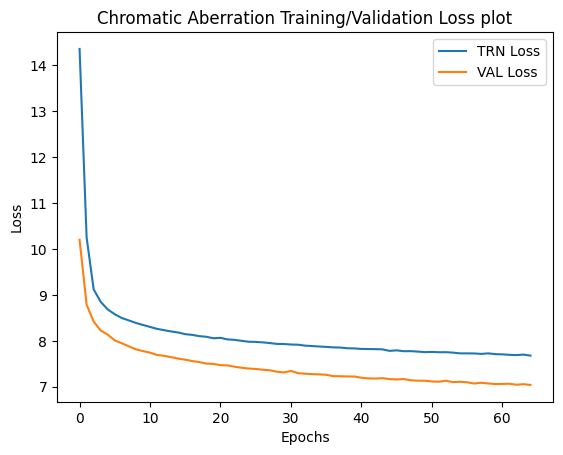

In [ ]:
plt.plot(range(len(global_trn_loss)), global_trn_loss, label='TRN Loss')
plt.plot(range(len(global_val_loss)), global_val_loss, label='VAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Chromatic Aberration Training/Validation Loss plot')
plt.legend()
plt.show()

### Fine tuning the model for prediction coordinates (full)

In [ ]:
# Freezing pretrained layers except the last fc layer
# Run this if you are loading the pretrained weights of the mail model
for param in modelCAN.cnn.parameters():
  param.requires_grad = True

for param in modelCAN.fc6.parameters():
  param.requires_grad = True

In [ ]:
optimizer = optim.SGD(modelCAN.parameters(), lr=0.0001, momentum=0.9)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                           mode='min',
                                           patience=5,
                                           factor=0.3, verbose=True)

In [ ]:
# global_trn_loss = []
# global_val_loss = []

for epoch in range(Config.num_epochs):
    train_running_loss = []
    val_running_loss = []
    start_time = time.time()
    modelCAN.train()
    for idx, data in tqdm(enumerate(trainloader), desc='Training', total=int(len(traindataset)/Config.batch_size)):
        bs, ncrops, c, h, w = data[0].size()
        bs, v1, v2 = data[1].size()

        # Reshape ncrops into batch size
        data[0] = data[0].view(-1, c, h, w)
        data[1] = data[1].view(-1, v2)
        data[0], data[1] = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        output = modelCAN(data[0])
        loss = torch.sqrt(criterion(output, data[1]))
        loss.backward()
        optimizer.step()
        
        train_running_loss.append(loss.item())
    else:
      modelCAN.eval()
      with torch.no_grad():
        for idx, data in tqdm(enumerate(valloader), desc='Validation', total=int(len(valdataset)/Config.batch_size)):
          bs, ncrops, c, h, w = data[0].size()
          bs, v1, v2 = data[1].size()
          # Reshape ncrops into batch size
          data[0] = data[0].view(-1, c, h, w)
          data[1] = data[1].view(-1, v2)
          data[0], data[1] = data[0].to(device), data[1].to(device)

          output = modelCAN(data[0])
          loss = torch.sqrt(criterion(output, data[1]))
          val_running_loss.append(loss.item())
        
    global_trn_loss.append(sum(train_running_loss) / len(train_running_loss))
    global_val_loss.append(sum(val_running_loss) / len(val_running_loss))

    scheduler.step(global_val_loss[-1])

    print('Epoch [{}/{}], TRNLoss:{:.4f}, VALLoss:{:.4f}, Time:{:.2f}'.format(
        epoch + 1, Config.num_epochs, global_trn_loss[-1], global_val_loss[-1],
        (time.time() - start_time) / 60))
    
    if epoch % 20 == 0:
      MODEL_SAVE_PATH = f'/gdrive/My Drive/model_CA_full_network_bs{Config.batch_size}_epochs{Config.num_epochs}_lr{Config.lr}_sd{Config.subset_data}_pd{Config.patch_dim}_g{Config.gap}.pt'
      print(f'Model Saved at {MODEL_SAVE_PATH}')
      torch.save(
        {
            'epoch': Config.num_epochs,
            'model_state_dict': modelCAN.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'global_trnloss': global_trn_loss,
            'global_valloss': global_val_loss
        }, MODEL_SAVE_PATH)


Epoch [1/65], TRNLoss:7.6110, VALLoss:6.9468, Time:0.83
Model Saved at /gdrive/My Drive/model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt



Epoch [2/65], TRNLoss:7.3954, VALLoss:6.6225, Time:0.84



Epoch [3/65], TRNLoss:7.2136, VALLoss:6.2929, Time:0.83



Epoch [4/65], TRNLoss:7.0871, VALLoss:6.1661, Time:0.83



Epoch [5/65], TRNLoss:6.9768, VALLoss:6.0405, Time:0.83



Epoch [6/65], TRNLoss:6.8989, VALLoss:5.9654, Time:0.83



Epoch [7/65], TRNLoss:6.8173, VALLoss:5.9198, Time:0.83



Epoch [8/65], TRNLoss:6.7748, VALLoss:5.8112, Time:0.83



Epoch [9/65], TRNLoss:6.7024, VALLoss:5.8250, Time:0.83



Epoch [10/65], TRNLoss:6.6498, VALLoss:5.7584, Time:0.83



Epoch [11/65], TRNLoss:6.5964, VALLoss:5.7716, Time:0.83



Epoch [12/65], TRNLoss:6.5604, VALLoss:5.7046, Time:0.83



Epoch [13/65], TRNLoss:6.4927, VALLoss:5.6963, Time:0.83



Epoch [14/65], TRNLoss:6.4525, VALLoss:5.6739, Time:0.83



Epoch [15/65], TRNLoss:6.4146, VALLoss:5.6320, Time:0.83



Epoch [16/65], TRNLoss:6.3778, VALLoss:5.5104, Time:0.83



Epoch [17/65], TRNLoss:6.3419, VALLoss:5.5514, Time:0.83



Epoch [18/65], TRNLoss:6.3192, VALLoss:5.5006, Time:0.83



Epoch [19/65], TRNLoss:6.2741, VALLoss:5.4337, Time:0.83



Epoch [20/65], TRNLoss:6.2400, VALLoss:5.4087, Time:0.83



Epoch [21/65], TRNLoss:6.2008, VALLoss:5.4505, Time:0.83
Model Saved at /gdrive/My Drive/model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt



Epoch [22/65], TRNLoss:6.1638, VALLoss:5.3583, Time:0.83



Epoch [23/65], TRNLoss:6.1296, VALLoss:5.3691, Time:0.83



Epoch [24/65], TRNLoss:6.1197, VALLoss:5.3377, Time:0.83



Epoch [25/65], TRNLoss:6.0911, VALLoss:5.3590, Time:0.83



Epoch [26/65], TRNLoss:6.0426, VALLoss:5.3033, Time:0.83



Epoch [27/65], TRNLoss:6.0380, VALLoss:5.2319, Time:0.83



Epoch [28/65], TRNLoss:6.0217, VALLoss:5.2681, Time:0.83



Epoch [29/65], TRNLoss:5.9889, VALLoss:5.2188, Time:0.83



Epoch [30/65], TRNLoss:5.9909, VALLoss:5.5950, Time:0.83



Epoch [31/65], TRNLoss:6.0362, VALLoss:5.2336, Time:0.83



Epoch [32/65], TRNLoss:5.9613, VALLoss:5.2109, Time:0.83



Epoch [33/65], TRNLoss:5.9291, VALLoss:5.1662, Time:0.83



Epoch [34/65], TRNLoss:5.8963, VALLoss:5.1177, Time:0.83



Epoch [35/65], TRNLoss:5.8669, VALLoss:5.1301, Time:0.83



Epoch [36/65], TRNLoss:5.8555, VALLoss:5.1562, Time:0.83



Epoch [37/65], TRNLoss:5.8191, VALLoss:5.0868, Time:0.83



Epoch [38/65], TRNLoss:5.8163, VALLoss:5.0387, Time:0.83



Epoch [39/65], TRNLoss:5.7704, VALLoss:5.1113, Time:0.83



Epoch [40/65], TRNLoss:5.7603, VALLoss:5.0179, Time:0.83



Epoch [41/65], TRNLoss:5.7445, VALLoss:5.0256, Time:0.83
Model Saved at /gdrive/My Drive/model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt



Epoch [42/65], TRNLoss:5.7305, VALLoss:5.0260, Time:0.83



Epoch [43/65], TRNLoss:5.7048, VALLoss:5.0171, Time:0.84



Epoch [44/65], TRNLoss:5.6734, VALLoss:4.9642, Time:0.83



Epoch [45/65], TRNLoss:5.6634, VALLoss:4.8952, Time:0.83



Epoch [46/65], TRNLoss:5.6400, VALLoss:4.9747, Time:0.83



Epoch [47/65], TRNLoss:5.6352, VALLoss:4.9030, Time:0.83



Epoch [48/65], TRNLoss:5.5962, VALLoss:4.8814, Time:0.83



Epoch [49/65], TRNLoss:5.6019, VALLoss:4.9176, Time:0.83



Epoch [50/65], TRNLoss:5.5775, VALLoss:4.8815, Time:0.83



Epoch [51/65], TRNLoss:5.5525, VALLoss:4.8612, Time:0.83



Epoch [52/65], TRNLoss:5.5581, VALLoss:4.8400, Time:0.83



Epoch [53/65], TRNLoss:5.5144, VALLoss:4.8076, Time:0.83



Epoch [54/65], TRNLoss:5.5078, VALLoss:4.9022, Time:0.83



Epoch [55/65], TRNLoss:5.5068, VALLoss:4.8900, Time:0.83



Epoch [56/65], TRNLoss:5.4822, VALLoss:4.8025, Time:0.83



Epoch [57/65], TRNLoss:5.4850, VALLoss:4.8955, Time:0.83



Epoch [58/65], TRNLoss:5.4484, VALLoss:4.7598, Time:0.84



Epoch [59/65], TRNLoss:5.4387, VALLoss:4.7522, Time:0.82



Epoch [60/65], TRNLoss:5.4113, VALLoss:4.7076, Time:0.83



Epoch [61/65], TRNLoss:5.4200, VALLoss:4.7584, Time:0.82
Model Saved at /gdrive/My Drive/model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt



Epoch [62/65], TRNLoss:5.3971, VALLoss:4.7728, Time:0.83



Epoch [63/65], TRNLoss:5.4154, VALLoss:4.7591, Time:0.82



Epoch [64/65], TRNLoss:5.3734, VALLoss:4.7378, Time:0.83



Epoch [65/65], TRNLoss:5.3595, VALLoss:4.7649, Time:0.83


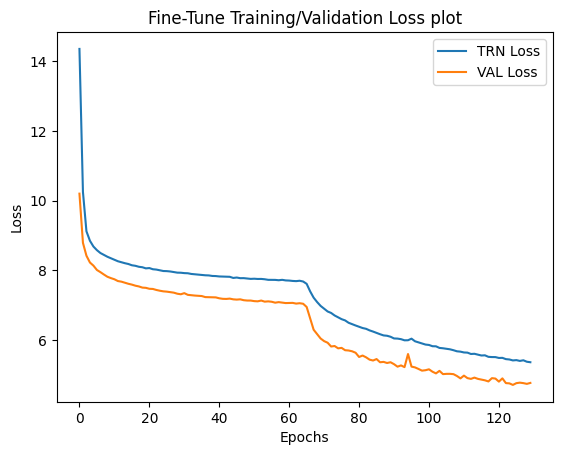

In [ ]:
plt.plot(range(len(global_trn_loss)), global_trn_loss, label='TRN Loss')
plt.plot(range(len(global_val_loss)), global_val_loss, label='VAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fine-Tune Training/Validation Loss plot')
plt.legend()
plt.show()

### Projection Dataset Class

In [ ]:
##########################
# Projection Dataset Class
##########################

class ProjectionDataset(Dataset):
  def __init__(self, patch_dim, gap, df, validate, transform=None):
    self.patch_dim, self.gap = patch_dim, gap
    self.transform = transform

    if validate:
      self.train_data = df.values
    else:
      self.train_data = df.values

  
  def get_patches_and_coordinates(self, image, patch_dim, gap):
    patch_loc_arr = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
    patch_coordinates = []
    offset_x, offset_y = image.shape[0] - (patch_dim*3 + gap*2), image.shape[1] - (patch_dim*3 + gap*2)

    start_grid_x, start_grid_y = 9, 9

    patch_bucket = np.empty([9, 3, 96, 96], dtype='float32')

    for i, (tempx, tempy) in enumerate(patch_loc_arr):
        tempx, tempy = patch_loc_arr[i]

        patch_x_pt = start_grid_x + patch_dim * (tempx-1) + gap * (tempx-1)
        patch_y_pt = start_grid_y + patch_dim * (tempy-1) + gap * (tempy-1)

        patch_coordinates.append([patch_x_pt, patch_y_pt])
        img_patch = image[patch_x_pt:patch_x_pt+patch_dim, patch_y_pt:patch_y_pt+patch_dim]

        # Dropped color channels 2 and 3 and replaced with gaussian noise(std ~1/100 of the std of the remaining channel)
        img_patch[:, :, 1] = np.random.normal(0.485, 0.01 * np.std(img_patch[:, :, 0]), (img_patch.shape[0],img_patch.shape[1]))
        img_patch[:, :, 2] = np.random.normal(0.485, 0.01 * np.std(img_patch[:, :, 0]), (img_patch.shape[0],img_patch.shape[1]))

        # Resizing the patch to 96x96
        if img_patch.shape[0] != 96:
          img_patch = skimage.transform.resize(img_patch, (96, 96)) 
          img_patch = img_as_float32(img_patch)
        
        patch_bucket[i] = np.transpose(img_patch, (2, 0, 1))

    return patch_bucket, np.array(patch_coordinates)

  def __len__(self):
    return len(self.train_data)
  
  def __getitem__(self, index):
    image = np.array(Image.open(self.train_data[index]).convert('RGB'))
    patch_bucket, coordinates = self.get_patches_and_coordinates(image, self.patch_dim, self.gap)

    coordinates = coordinates.astype(np.float32)

    return patch_bucket, coordinates 



traindataset = ProjectionDataset(Config.patch_dim, Config.gap, df_trn['filename'], False,
                         transforms.Compose([transforms.ToTensor(),
                                            ])
                         )
trainloader = torch.utils.data.DataLoader(traindataset, 
                                          batch_size=Config.batch_size,
                                          shuffle=True,
                                          )


valdataset = ProjectionDataset(Config.patch_dim, Config.gap, df_val['filename'], True,
                         transforms.Compose([transforms.ToTensor(),
                                            ])
                         )
valloader = torch.utils.data.DataLoader(valdataset,
                                        batch_size=Config.batch_size,
                                        shuffle=False)

### Projection Network 

In this model, we dropped color channels 2 and 3 and replaced with gaussian noise (std ~1/100 of the std of the remaining channel)

In [ ]:
class ProjectionNetwork(nn.Module):
  def __init__(self):
    super(ProjectionNetwork, self).__init__() 
    self.cnn = nn.Sequential(
      nn.Conv2d(3, 96, kernel_size=11, stride=4),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.LocalResponseNorm(96),
      
      nn.Conv2d(96, 384, kernel_size=5, stride = 2,padding = 2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.LocalResponseNorm(384),
      
      nn.Conv2d(384, 384, kernel_size=3, stride=1,padding = 1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(384),
      
      nn.Conv2d(384, 384, kernel_size=3, stride=1,padding = 1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(384),
      
      nn.Conv2d(384, 256, kernel_size=3, stride=1,padding = 1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(256),
      nn.MaxPool2d(kernel_size=3, stride=2,padding = 1),
    )
    self.fc6 = nn.Sequential(
      nn.Linear(256,4096),
      nn.ReLU(inplace=True),
      nn.BatchNorm1d(4096),
    )
    self.fc = nn.Sequential(
      nn.Linear(4096, 2)
    )

  def forward(self, patch_bunch):
    bs, _, _, _ = patch_bunch.shape
    output = self.cnn(patch_bunch)
    output = output.view(bs, -1)
    output = self.fc6(output)
    output = self.fc(output)
    return output

modelPROJ = ProjectionNetwork().to(device)

In [ ]:
###############################################
# Load pretrained weights of the previous model
###############################################
m = model.state_dict()
mc = modelPROJ.state_dict()

for idx, k in enumerate(m.keys()):
  if idx < 32:
    mc[k].copy_(m[k])
  else:
    print(f'{k} layer weights NOT saved')

fc.0.weight layer weights NOT saved
fc.0.bias layer weights NOT saved
fc.2.weight layer weights NOT saved
fc.2.bias layer weights NOT saved
fc.4.weight layer weights NOT saved
fc.4.bias layer weights NOT saved


In [ ]:
# Freezing pretrained layers except the last fc layer
# Run this if you are loading the pretrained weights of the prev model
for param in modelPROJ.cnn.parameters():
  param.requires_grad = False

for param in modelPROJ.fc6.parameters():
  param.requires_grad = False

In [ ]:
optimizer = optim.SGD(modelPROJ.fc.parameters(), lr=0.01, momentum=0.9)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                           mode='min',
                                           patience=5,
                                           factor=0.3, verbose=True)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
global_trn_loss = []
global_val_loss = []
# previous_val_loss = 100

for epoch in range(Config.num_epochs):
    train_running_loss = []
    val_running_loss = []
    start_time = time.time()
    modelPROJ.train()
    for idx, data in tqdm(enumerate(trainloader), desc='Training', total=int(len(traindataset)/Config.batch_size)):
        bs, ncrops, c, h, w = data[0].size()
        bs, v1, v2 = data[1].size()

        # Reshape ncrops into batch size
        data[0] = data[0].view(-1, c, h, w)
        data[1] = data[1].view(-1, v2)
        data[0], data[1] = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        output = modelPROJ(data[0])
        loss = torch.sqrt(criterion(output, data[1]))
        loss.backward()
        optimizer.step()
        
        train_running_loss.append(loss.item())
    else:
      modelPROJ.eval()
      with torch.no_grad():
        for idx, data in tqdm(enumerate(valloader), desc='Validation', total=int(len(valdataset)/Config.batch_size)):
          bs, ncrops, c, h, w = data[0].size()
          bs, v1, v2 = data[1].size()
          # Reshape ncrops into batch size
          data[0] = data[0].view(-1, c, h, w)
          data[1] = data[1].view(-1, v2)
          data[0], data[1] = data[0].to(device), data[1].to(device)

          output = modelPROJ(data[0])
          loss = torch.sqrt(criterion(output, data[1]))
          val_running_loss.append(loss.item())
        
    global_trn_loss.append(sum(train_running_loss) / len(train_running_loss))
    global_val_loss.append(sum(val_running_loss) / len(val_running_loss))

    scheduler.step(global_val_loss[-1])

    print('Epoch [{}/{}], TRNLoss:{:.4f}, VALLoss:{:.4f}, Time:{:.2f}'.format(
        epoch + 1, Config.num_epochs, global_trn_loss[-1], global_val_loss[-1],
        (time.time() - start_time) / 60))
    
    if epoch % 20 == 0:
      MODEL_SAVE_PATH = f'/gdrive/My Drive/training_models/model_PROJ_base_bs{Config.batch_size}_epochs{Config.num_epochs}_lr{Config.lr}_sd{Config.subset_data}_pd{Config.patch_dim}_g{Config.gap}.pt'
      print(f'Model Saved at {MODEL_SAVE_PATH}')
      torch.save(
        {
            'epoch': Config.num_epochs,
            'model_state_dict': modelPROJ.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'global_trnloss': global_trn_loss,
            'global_valloss': global_val_loss
        }, MODEL_SAVE_PATH)


Epoch [1/65], TRNLoss:26.9074, VALLoss:20.4866, Time:0.66
Model Saved at /gdrive/My Drive/training_models/model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [2/65], TRNLoss:16.9496, VALLoss:15.0402, Time:0.66



Epoch [3/65], TRNLoss:15.0850, VALLoss:14.7789, Time:0.66



Epoch [4/65], TRNLoss:14.6170, VALLoss:14.3779, Time:0.66



Epoch [5/65], TRNLoss:14.5132, VALLoss:14.3140, Time:0.66



Epoch [6/65], TRNLoss:14.4586, VALLoss:14.3929, Time:0.66



Epoch [7/65], TRNLoss:14.4348, VALLoss:14.3089, Time:0.66



Epoch [8/65], TRNLoss:14.4180, VALLoss:14.3470, Time:0.66



Epoch [9/65], TRNLoss:14.3818, VALLoss:14.2468, Time:0.66



Epoch [10/65], TRNLoss:14.3456, VALLoss:14.2390, Time:0.66



Epoch [11/65], TRNLoss:14.3423, VALLoss:14.3182, Time:0.66



Epoch [12/65], TRNLoss:14.3512, VALLoss:14.3226, Time:0.66



Epoch [13/65], TRNLoss:14.3276, VALLoss:14.3260, Time:0.66



Epoch [14/65], TRNLoss:14.3176, VALLoss:14.1658, Time:0.66



Epoch [15/65], TRNLoss:14.2959, VALLoss:14.2495, Time:0.66



Epoch [16/65], TRNLoss:14.2923, VALLoss:14.2068, Time:0.66



Epoch [17/65], TRNLoss:14.3015, VALLoss:14.2374, Time:0.66



Epoch [18/65], TRNLoss:14.2696, VALLoss:14.1607, Time:0.66



Epoch [19/65], TRNLoss:14.2679, VALLoss:14.2143, Time:0.66



Epoch [20/65], TRNLoss:14.2679, VALLoss:14.1267, Time:0.66



Epoch [21/65], TRNLoss:14.2558, VALLoss:14.2186, Time:0.66
Model Saved at /gdrive/My Drive/training_models/model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [22/65], TRNLoss:14.2605, VALLoss:14.1177, Time:0.66



Epoch [23/65], TRNLoss:14.2643, VALLoss:14.1838, Time:0.66



Epoch [24/65], TRNLoss:14.2482, VALLoss:14.1321, Time:0.66



Epoch [25/65], TRNLoss:14.2477, VALLoss:14.1616, Time:0.66



Epoch [26/65], TRNLoss:14.2215, VALLoss:14.0837, Time:0.66



Epoch [27/65], TRNLoss:14.2251, VALLoss:14.2470, Time:0.66



Epoch [28/65], TRNLoss:14.2139, VALLoss:14.0964, Time:0.66



Epoch [29/65], TRNLoss:14.2394, VALLoss:14.1926, Time:0.66



Epoch [30/65], TRNLoss:14.2007, VALLoss:14.0818, Time:0.66



Epoch [31/65], TRNLoss:14.2259, VALLoss:14.1430, Time:0.66



Epoch [32/65], TRNLoss:14.2120, VALLoss:14.0431, Time:0.66



Epoch [33/65], TRNLoss:14.2129, VALLoss:14.1337, Time:0.66



Epoch [34/65], TRNLoss:14.2040, VALLoss:13.9998, Time:0.66



Epoch [35/65], TRNLoss:14.2125, VALLoss:14.1456, Time:0.67



Epoch [36/65], TRNLoss:14.2069, VALLoss:14.2497, Time:0.66



Epoch [37/65], TRNLoss:14.2034, VALLoss:14.1446, Time:0.66



Epoch [38/65], TRNLoss:14.1959, VALLoss:14.1318, Time:0.66



Epoch [39/65], TRNLoss:14.1909, VALLoss:14.1449, Time:0.67



Epoch    40: reducing learning rate of group 0 to 3.0000e-03.
Epoch [40/65], TRNLoss:14.1876, VALLoss:14.1254, Time:0.66



Epoch [41/65], TRNLoss:14.1767, VALLoss:14.0977, Time:0.66
Model Saved at /gdrive/My Drive/training_models/model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [42/65], TRNLoss:14.1874, VALLoss:14.1290, Time:0.66



Epoch [43/65], TRNLoss:14.1847, VALLoss:14.0856, Time:0.67



Epoch [44/65], TRNLoss:14.1704, VALLoss:14.0468, Time:0.66



Epoch [45/65], TRNLoss:14.1887, VALLoss:14.1103, Time:0.66



Epoch    46: reducing learning rate of group 0 to 9.0000e-04.
Epoch [46/65], TRNLoss:14.1918, VALLoss:14.1329, Time:0.66



Epoch [47/65], TRNLoss:14.1850, VALLoss:13.9849, Time:0.66



Epoch [48/65], TRNLoss:14.1877, VALLoss:14.1393, Time:0.66



Epoch [49/65], TRNLoss:14.1704, VALLoss:14.0053, Time:0.66



Epoch [50/65], TRNLoss:14.1831, VALLoss:14.1128, Time:0.66



Epoch [51/65], TRNLoss:14.1893, VALLoss:14.0396, Time:0.66



Epoch [52/65], TRNLoss:14.1812, VALLoss:14.0584, Time:0.66



Epoch    53: reducing learning rate of group 0 to 2.7000e-04.
Epoch [53/65], TRNLoss:14.1742, VALLoss:14.1233, Time:0.66



Epoch [54/65], TRNLoss:14.1755, VALLoss:14.1962, Time:0.66



Epoch [55/65], TRNLoss:14.1669, VALLoss:14.1089, Time:0.66



Epoch [56/65], TRNLoss:14.1922, VALLoss:14.0954, Time:0.66



Epoch [57/65], TRNLoss:14.1856, VALLoss:14.0798, Time:0.66



Epoch [58/65], TRNLoss:14.1792, VALLoss:14.1075, Time:0.66



Epoch    59: reducing learning rate of group 0 to 8.1000e-05.
Epoch [59/65], TRNLoss:14.1845, VALLoss:14.1504, Time:0.66



Epoch [60/65], TRNLoss:14.1969, VALLoss:14.0847, Time:0.66



Epoch [61/65], TRNLoss:14.1789, VALLoss:14.0723, Time:0.66
Model Saved at /gdrive/My Drive/training_models/model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [62/65], TRNLoss:14.1890, VALLoss:14.2116, Time:0.67



Epoch [63/65], TRNLoss:14.1638, VALLoss:14.0360, Time:0.66



Epoch [64/65], TRNLoss:14.1798, VALLoss:14.0655, Time:0.66



Epoch    65: reducing learning rate of group 0 to 2.4300e-05.
Epoch [65/65], TRNLoss:14.1819, VALLoss:14.1817, Time:0.66


In [ ]:
!ls -la /gdrive/My\ Drive/training_models

total 808103
-rw------- 1 root root 671246255 Jun  7 07:46 model_64_65_0.0005_1000_15_3.pt
-rw------- 1 root root  22352954 Jun  7 07:35 model_CA_base_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
-rw------- 1 root root  44596383 Jun  7 08:41 model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
-rw------- 1 root root  22351882 Jun  7 10:54 model_PROJ_base_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
-rw------- 1 root root  22352910 Jun  7 12:10 model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt
-rw------- 1 root root  44594457 Jun  7 11:07 model_PROJ_full_network_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt


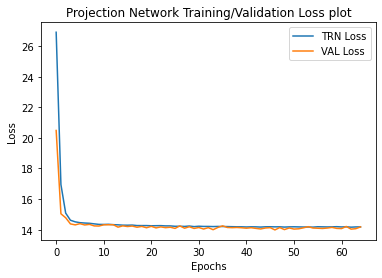

In [ ]:
plt.plot(range(len(global_trn_loss)), global_trn_loss, label='TRN Loss')
plt.plot(range(len(global_val_loss)), global_val_loss, label='VAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Projection Network Training/Validation Loss plot')
plt.legend()
plt.show()

### Fine tuning the model for prediction coordinates

In [ ]:
checkpoint = torch.load('/gdrive/My Drive/training_models/model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt', map_location=device)
modelPROJ.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
# Freezing pretrained layers except the last fc layer
# Run this if you are loading the pretrained weights of the prev model

for param in modelPROJ.cnn.parameters():
  param.requires_grad = True

for param in modelPROJ.fc6.parameters():
  param.requires_grad = True

In [ ]:
optimizer = optim.SGD(modelPROJ.parameters(), lr=0.0001, momentum=0.9)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                           mode='min',
                                           patience=5,
                                           factor=0.3, verbose=True)

In [ ]:
global_trn_loss = checkpoint['global_trnloss']
global_val_loss = checkpoint['global_valloss']

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# global_trn_loss = []
# global_val_loss = []
# previous_val_loss = 100

for epoch in range(Config.num_epochs):
    train_running_loss = []
    val_running_loss = []
    start_time = time.time()
    modelPROJ.train()
    for idx, data in tqdm(enumerate(trainloader), desc='Training', total=int(len(traindataset)/Config.batch_size)):
        bs, ncrops, c, h, w = data[0].size()
        bs, v1, v2 = data[1].size()

        # Reshape ncrops into batch size
        data[0] = data[0].view(-1, c, h, w)
        data[1] = data[1].view(-1, v2)
        data[0], data[1] = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        output = modelPROJ(data[0])
        loss = torch.sqrt(criterion(output, data[1]))
        loss.backward()
        optimizer.step()
        
        train_running_loss.append(loss.item())
    else:
      modelPROJ.eval()
      with torch.no_grad():
        for idx, data in tqdm(enumerate(valloader), desc='Validation', total=int(len(valdataset)/Config.batch_size)):
          bs, ncrops, c, h, w = data[0].size()
          bs, v1, v2 = data[1].size()
          # Reshape ncrops into batch size
          data[0] = data[0].view(-1, c, h, w)
          data[1] = data[1].view(-1, v2)
          data[0], data[1] = data[0].to(device), data[1].to(device)

          output = modelPROJ(data[0])
          loss = torch.sqrt(criterion(output, data[1]))
          val_running_loss.append(loss.item())
        
    global_trn_loss.append(sum(train_running_loss) / len(train_running_loss))
    global_val_loss.append(sum(val_running_loss) / len(val_running_loss))

    scheduler.step(global_val_loss[-1])

    print('Epoch [{}/{}], TRNLoss:{:.4f}, VALLoss:{:.4f}, Time:{:.2f}'.format(
        epoch + 1, Config.num_epochs, global_trn_loss[-1], global_val_loss[-1],
        (time.time() - start_time) / 60))
    
    if epoch % 20 == 0:
      MODEL_SAVE_PATH = f'/gdrive/My Drive/training_models/model_PROJ_full_network_bs{Config.batch_size}_epochs{Config.num_epochs}_lr{Config.lr}_sd{Config.subset_data}_pd{Config.patch_dim}_g{Config.gap}.pt'
      print(f'Model Saved at {MODEL_SAVE_PATH}')
      torch.save(
        {
            'epoch': Config.num_epochs,
            'model_state_dict': modelPROJ.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'global_trnloss': global_trn_loss,
            'global_valloss': global_val_loss
        }, MODEL_SAVE_PATH)


Epoch [1/65], TRNLoss:14.1918, VALLoss:14.2001, Time:0.54
Model Saved at /gdrive/My Drive/training_models/model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [2/65], TRNLoss:14.1700, VALLoss:14.0310, Time:0.54



Epoch [3/65], TRNLoss:14.1687, VALLoss:14.2538, Time:0.53



Epoch [4/65], TRNLoss:14.1772, VALLoss:14.0680, Time:0.54



Epoch [5/65], TRNLoss:14.1637, VALLoss:13.9708, Time:0.54



Epoch [6/65], TRNLoss:14.1507, VALLoss:14.1418, Time:0.56



Epoch [7/65], TRNLoss:14.1523, VALLoss:14.0626, Time:0.57



Epoch [8/65], TRNLoss:14.1745, VALLoss:14.1162, Time:0.56



Epoch [9/65], TRNLoss:14.1771, VALLoss:14.0624, Time:0.56



Epoch [10/65], TRNLoss:14.1546, VALLoss:14.0017, Time:0.55



Epoch    11: reducing learning rate of group 0 to 3.0000e-05.
Epoch [11/65], TRNLoss:14.1475, VALLoss:14.1193, Time:0.56



Epoch [12/65], TRNLoss:14.1536, VALLoss:14.1139, Time:0.56



Epoch [13/65], TRNLoss:14.1675, VALLoss:14.1397, Time:0.55



Epoch [14/65], TRNLoss:14.1452, VALLoss:14.0218, Time:0.55



Epoch [15/65], TRNLoss:14.1536, VALLoss:14.0764, Time:0.56



Epoch [16/65], TRNLoss:14.1574, VALLoss:14.0357, Time:0.55



Epoch    17: reducing learning rate of group 0 to 9.0000e-06.
Epoch [17/65], TRNLoss:14.1584, VALLoss:14.1249, Time:0.55



Epoch [18/65], TRNLoss:14.1556, VALLoss:14.0011, Time:0.55



Epoch [19/65], TRNLoss:14.1546, VALLoss:14.0834, Time:0.56



Epoch [20/65], TRNLoss:14.1743, VALLoss:14.0040, Time:0.56



Epoch [21/65], TRNLoss:14.1454, VALLoss:14.1381, Time:0.55
Model Saved at /gdrive/My Drive/training_models/model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [22/65], TRNLoss:14.1592, VALLoss:14.0112, Time:0.55



Epoch    23: reducing learning rate of group 0 to 2.7000e-06.
Epoch [23/65], TRNLoss:14.1366, VALLoss:14.1175, Time:0.55



Epoch [24/65], TRNLoss:14.1503, VALLoss:14.0697, Time:0.55



Epoch [25/65], TRNLoss:14.1527, VALLoss:14.0547, Time:0.55



Epoch [26/65], TRNLoss:14.1494, VALLoss:13.9790, Time:0.55



Epoch [27/65], TRNLoss:14.1528, VALLoss:14.1645, Time:0.55



Epoch [28/65], TRNLoss:14.1640, VALLoss:14.0178, Time:0.55



Epoch    29: reducing learning rate of group 0 to 8.1000e-07.
Epoch [29/65], TRNLoss:14.1530, VALLoss:14.1108, Time:0.55



Epoch [30/65], TRNLoss:14.1414, VALLoss:14.0088, Time:0.55



Epoch [31/65], TRNLoss:14.1627, VALLoss:14.0949, Time:0.55



Epoch [32/65], TRNLoss:14.1576, VALLoss:13.9687, Time:0.55



Epoch [33/65], TRNLoss:14.1479, VALLoss:14.0995, Time:0.55



Epoch [34/65], TRNLoss:14.1484, VALLoss:13.9772, Time:0.56



Epoch [35/65], TRNLoss:14.1647, VALLoss:14.0973, Time:0.55



Epoch [36/65], TRNLoss:14.1477, VALLoss:14.1998, Time:0.55



Epoch [37/65], TRNLoss:14.1793, VALLoss:14.1094, Time:0.55



Epoch    38: reducing learning rate of group 0 to 2.4300e-07.
Epoch [38/65], TRNLoss:14.1459, VALLoss:14.0820, Time:0.55



Epoch [39/65], TRNLoss:14.1494, VALLoss:14.1109, Time:0.55



Epoch [40/65], TRNLoss:14.1429, VALLoss:14.0672, Time:0.55



Epoch [41/65], TRNLoss:14.1457, VALLoss:14.0616, Time:0.55
Model Saved at /gdrive/My Drive/training_models/model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [42/65], TRNLoss:14.1695, VALLoss:14.1001, Time:0.55



Epoch [43/65], TRNLoss:14.1462, VALLoss:14.0598, Time:0.55



Epoch    44: reducing learning rate of group 0 to 7.2900e-08.
Epoch [44/65], TRNLoss:14.1513, VALLoss:14.0143, Time:0.54



Epoch [45/65], TRNLoss:14.1497, VALLoss:14.0802, Time:0.55



Epoch [46/65], TRNLoss:14.1374, VALLoss:14.1071, Time:0.55



Epoch [47/65], TRNLoss:14.1413, VALLoss:13.9636, Time:0.55



Epoch [48/65], TRNLoss:14.1619, VALLoss:14.1104, Time:0.55



Epoch [49/65], TRNLoss:14.1517, VALLoss:13.9854, Time:0.56



Epoch [50/65], TRNLoss:14.1471, VALLoss:14.0902, Time:0.55



Epoch [51/65], TRNLoss:14.1480, VALLoss:14.0057, Time:0.55



Epoch [52/65], TRNLoss:14.1570, VALLoss:14.0331, Time:0.55



Epoch    53: reducing learning rate of group 0 to 2.1870e-08.
Epoch [53/65], TRNLoss:14.1573, VALLoss:14.1026, Time:0.55



Epoch [54/65], TRNLoss:14.1582, VALLoss:14.1635, Time:0.55



Epoch [55/65], TRNLoss:14.1543, VALLoss:14.0840, Time:0.54



Epoch [56/65], TRNLoss:14.1513, VALLoss:14.0643, Time:0.55



Epoch [57/65], TRNLoss:14.1640, VALLoss:14.0514, Time:0.54



Epoch [58/65], TRNLoss:14.1576, VALLoss:14.0755, Time:0.55



Epoch    59: reducing learning rate of group 0 to 6.5610e-09.
Epoch [59/65], TRNLoss:14.1560, VALLoss:14.1286, Time:0.55



Epoch [60/65], TRNLoss:14.1578, VALLoss:14.0628, Time:0.55



Epoch [61/65], TRNLoss:14.1405, VALLoss:14.0443, Time:0.55
Model Saved at /gdrive/My Drive/training_models/model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt



Epoch [62/65], TRNLoss:14.1364, VALLoss:14.1949, Time:0.55



Epoch [63/65], TRNLoss:14.1451, VALLoss:14.0134, Time:0.54



Epoch [64/65], TRNLoss:14.1535, VALLoss:14.0429, Time:0.54



Epoch [65/65], TRNLoss:14.1439, VALLoss:14.1474, Time:0.55


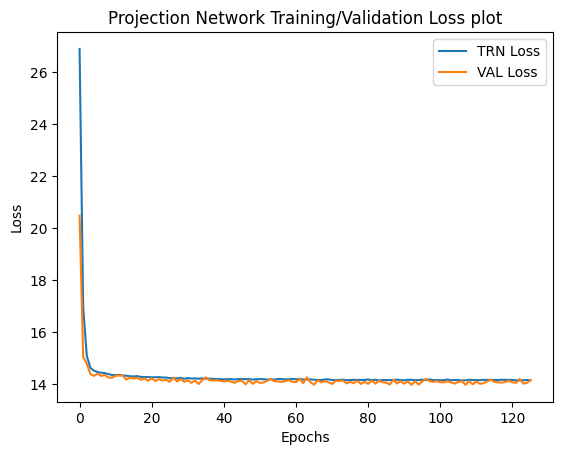

In [ ]:
plt.plot(range(len(global_trn_loss)), global_trn_loss, label='TRN Loss')
plt.plot(range(len(global_val_loss)), global_val_loss, label='VAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Projection Network Training/Validation Loss plot')
plt.legend()
plt.show()

# Results and Discussions

## Results Nearest Neighbors

In [ ]:
model = AlexNetwork().to(device)

random_net = AlexNetwork().to(device)

checkpoint = torch.load('/gdrive/My Drive/training_models/model_colab_300.pt', map_location='cuda')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
alexnet = models.alexnet(pretrained=True)
new_classifier = nn.Sequential(*list(alexnet.classifier.children())[:-1])
alexnet.classifier = new_classifier

alexnet.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Create 2 loaders
# One is used for calculating vectors
# Second one is used for comparing the vectors
std = np.array([np.ones((96,96))*0.229, np.ones((96,96))*0.224, np.ones((96,96))*0.225])
mean = np.array([np.ones((96,96))*0.485, np.ones((96,96))*0.456, np.ones((96,96))*0.406])

dataloader_1 = DataLoader(traindataset,
                        shuffle=True,
                        batch_size=64)
dataloader_2 = DataLoader(traindataset,
                        shuffle=True,
                        batch_size=64)
data_iter_1 = iter(dataloader_1)
data_iter_2 = iter(dataloader_2)

example_batch = next(data_iter_1)

# lists for storing vectors of pre-trained, trained and random model

vectors_pretrained = []
vectors_trained = []
vectors_random = []
for j, data in enumerate(dataloader_2,0):
    img0, img1 , label = data
    #print(label)
    label = label.reshape([-1])
    img0, img1 , label = img0.float().to(device), img1.float().to(device) , label.long().to(device)
    
    # Output3 contains vector for trained model
    output ,output1,output3= model(img0,img1)
    
    # Output2 contains vector for pre-trained model
    output2 = alexnet(img1.float())
    
    # Output4 contains vector for a random initialization
    output ,output1,output4= random_net(img0,img1)

    img1 = img1.cpu().detach().numpy()
    #All vectors are stored in numpy format
    output2 = output2.cpu().detach().numpy()
    output3 = output3.cpu().detach().numpy()
    output4 = output4.cpu().detach().numpy()
    
    for i in range(len(output2)):
        vectors_pretrained.append([img1[i],output2[i]])
    for i in range(len(output3)):
        vectors_trained.append([img1[i],output3[i]])
    for i in range(len(output4)):
        vectors_random.append([img1[i],output4[i]])        

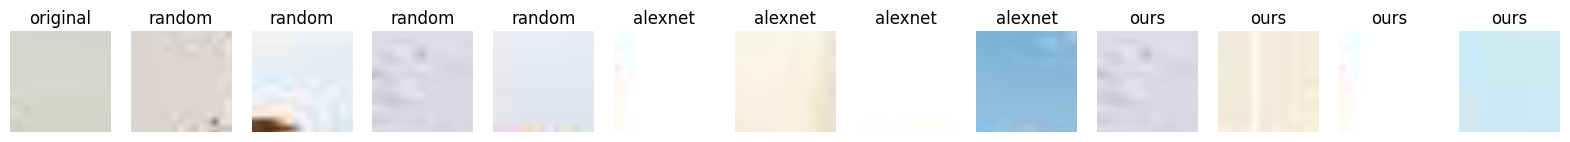

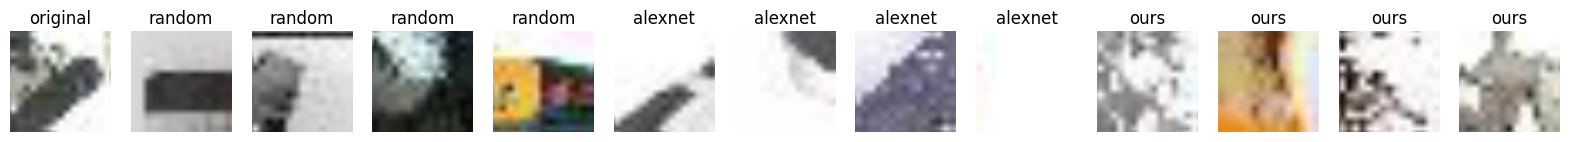

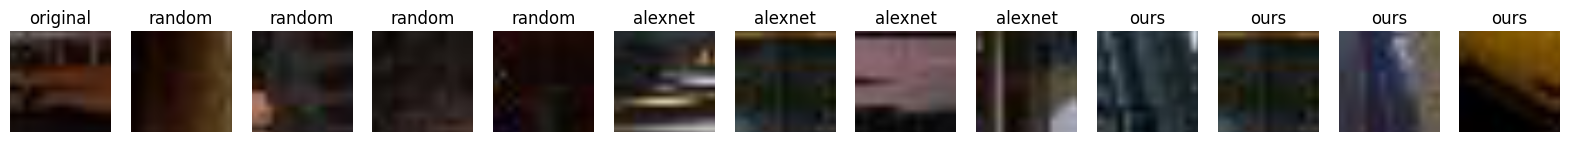

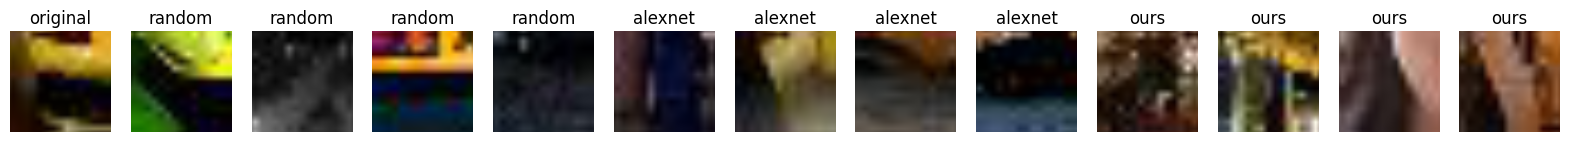

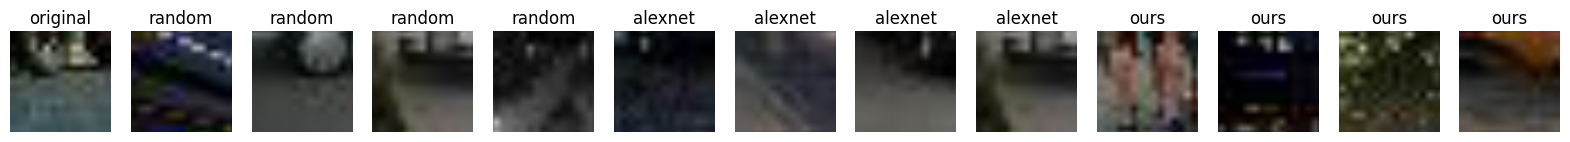

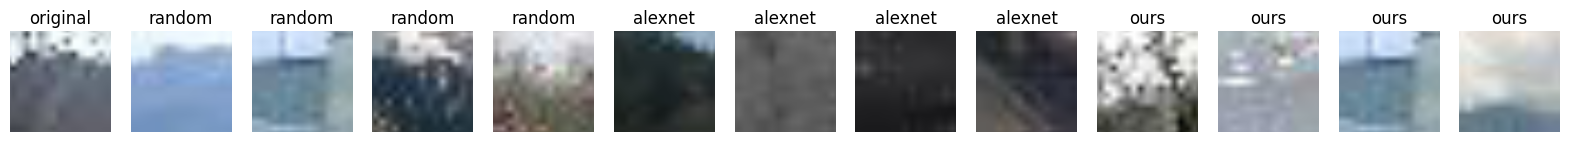

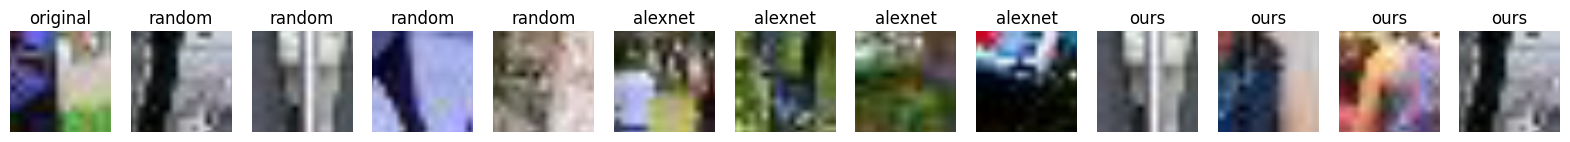

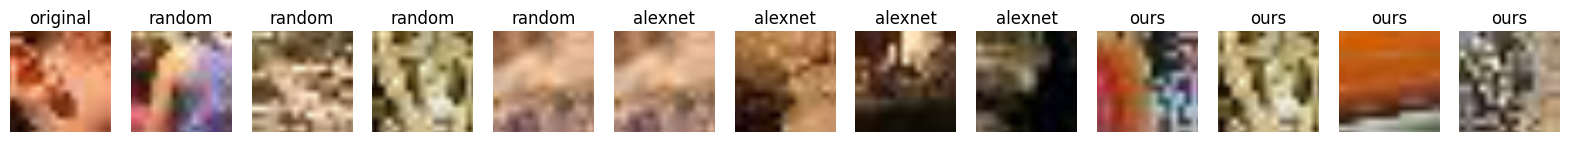

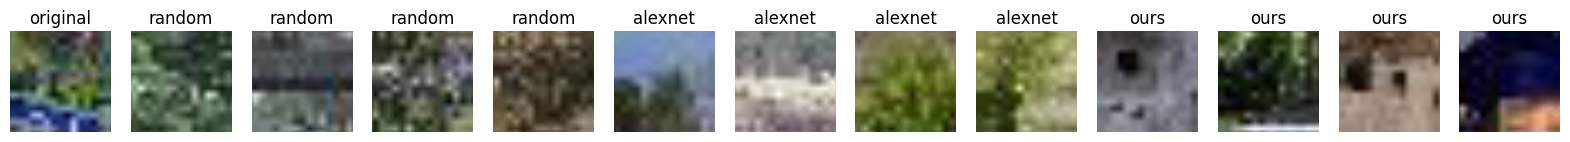

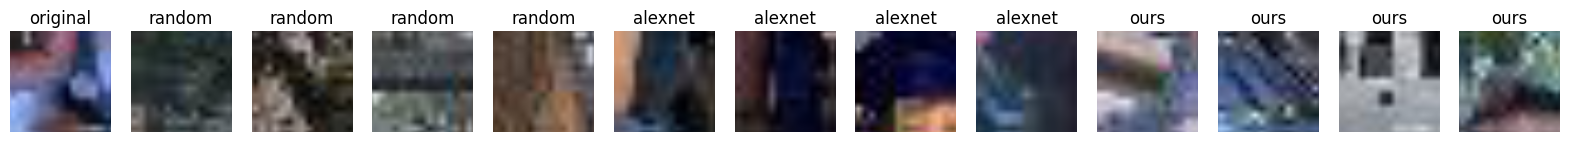

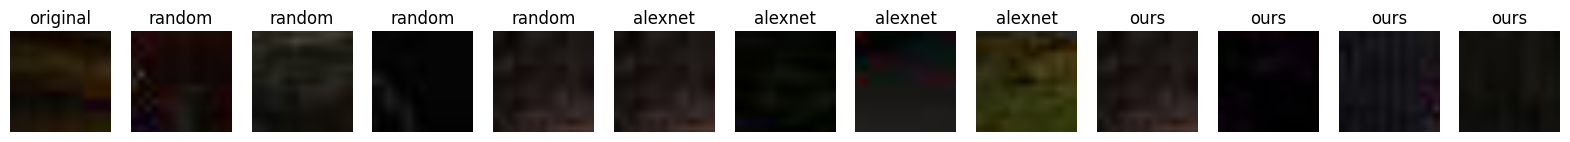

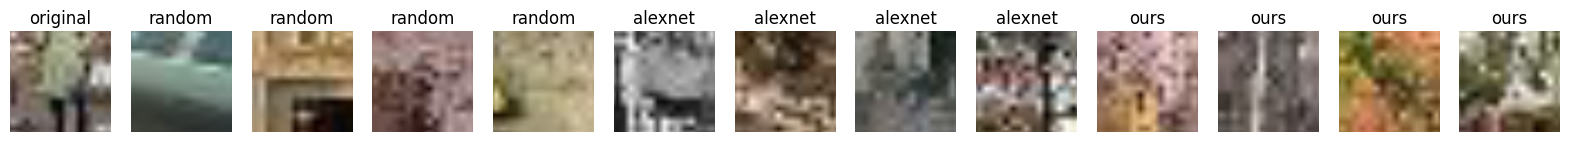

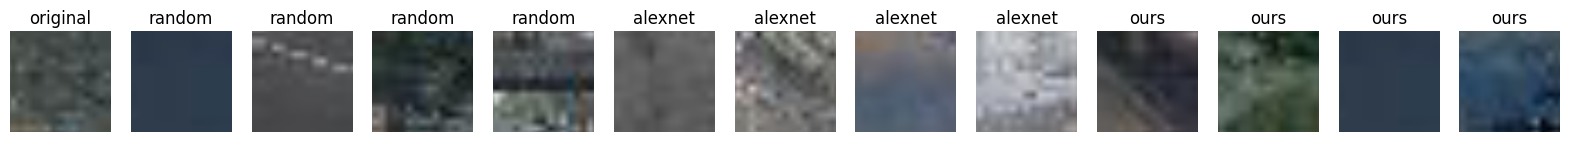

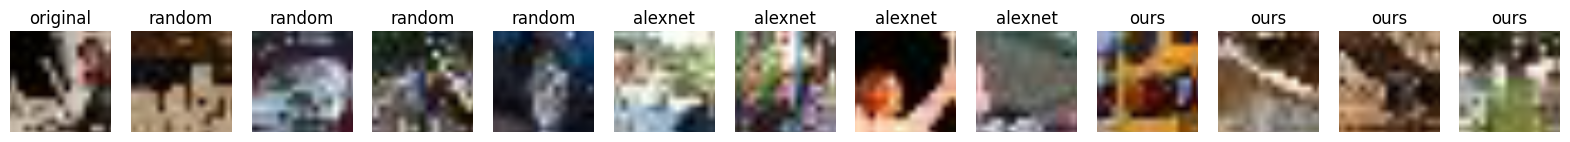

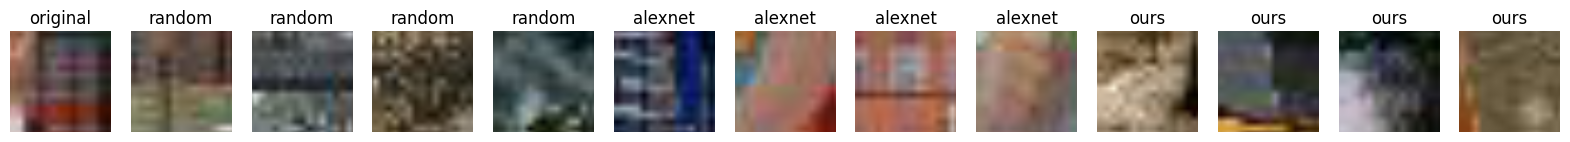

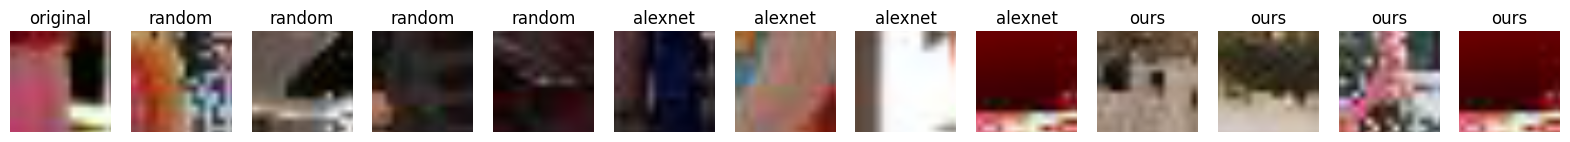

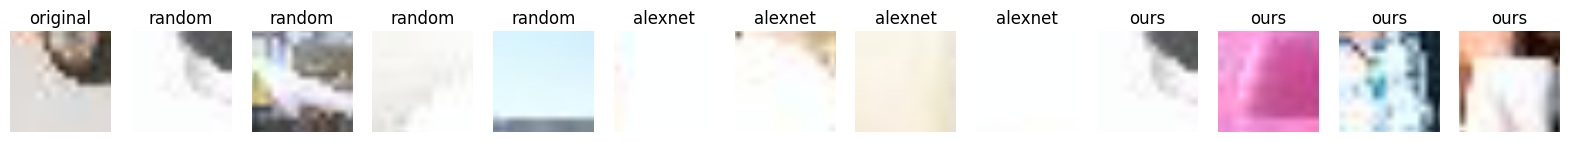

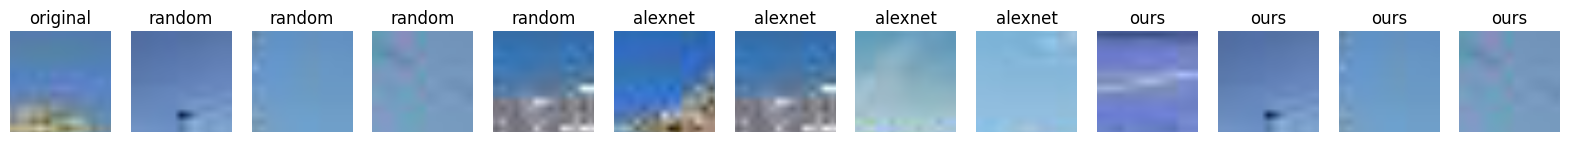

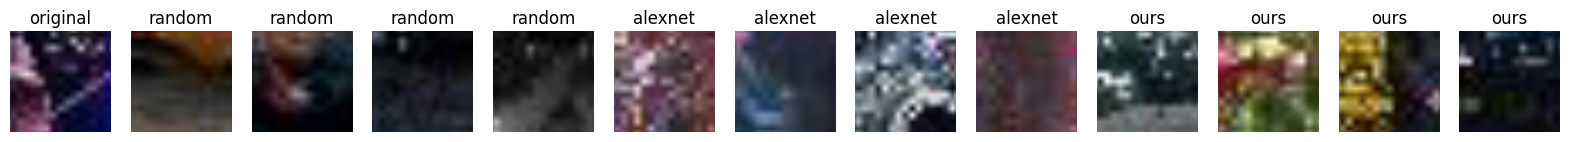

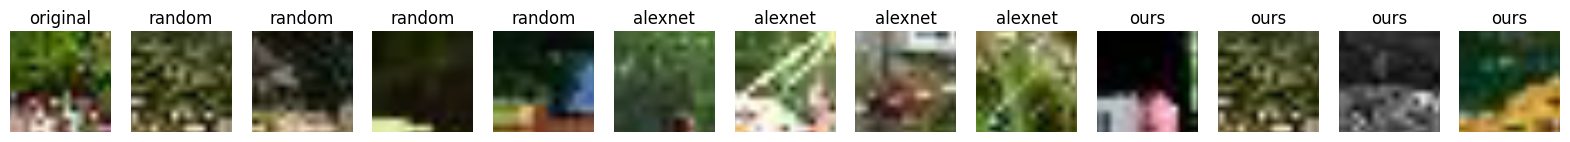

In [ ]:
#example.shape
img0 , img1 , label = example_batch
label = label.reshape([-1])
img0, img1 , label = img0.float().to(device), img1.float().to(device) , label.long().to(device)

#Calculate the reference vector for each model similar to the above method.
output2 = alexnet(img1)
output_pretrained = output2.cpu().detach().numpy()
output ,output1,output3= model(img0,img1)
output ,output1,output4= random_net(img0,img1)
img1 = img1.cpu().detach().numpy()
output_trained = output3.cpu().detach().numpy()
output_random = output4.cpu().detach().numpy()


for i in range(20):
    #Sort the vectors according to the euclidean distance between the vectors
    vectors_pretrained.sort(key=lambda tup: np.linalg.norm(tup[1]-output_pretrained[i]))
    vectors_trained.sort(key=lambda tup: np.linalg.norm(tup[1]-output_trained[i]))
    vectors_random.sort(key=lambda tup: np.linalg.norm(tup[1]-output_random[i]))
    npimg = img1[i]
    fig = plt.figure(figsize=(20.,20.))
    ax1 = fig.add_subplot(1,13,1)
    #Plot each image after denormalizing.
    plt.axis("off")
    plt.title("original")
    plt.grid()
    ax1.imshow(np.transpose(np.clip(np.multiply(npimg,std)+mean,0,1), (1, 2, 0)))
    #First loop plots similar images according random initialization
    for j in range(1,5):
      ax1 = fig.add_subplot(1,13,j+1)
      ax1.imshow(np.transpose(np.clip(np.multiply(vectors_random[j-1][0],std)+mean,0,1), (1, 2, 0)))
      plt.axis("off")
      plt.title("random")
    #First loop plots similar images according to pretrained model
    for j in range(1,5):
      ax1 = fig.add_subplot(1,13,j+5)
      ax1.imshow(np.transpose(np.clip(np.multiply(vectors_pretrained[j-1][0],std)+mean,0,1), (1, 2, 0)))
      plt.axis("off")
      plt.title("alexnet")
    #First loop plots similar images according to our trained model
    for j in range(1,5):
      ax1 = fig.add_subplot(1,13,j+9)
      ax1.imshow(np.transpose(np.clip(np.multiply(vectors_trained[j-1][0],std)+mean,0,1), (1, 2, 0)))
      # ax1.imshow(np.transpose(unorm(torch.tensor(vectors[j-1][0])), (1, 2, 0)))
      plt.axis("off")
      plt.title("ours")
    plt.show()

### Observation from above figure:
> We have plotted the similar images according to different models. The original image is the input image. Random denotes the similar images according to random initialization of the model. Similarly we plot the images of pre-trained alexnet model and our trained model. We can see that even the similar images according to randomly initialized model also fares comparatively better. This is because of the fact that the vectors of each image is some non linear function of the input image. As the alex net is trained on the entire imagenet dataset the features obtained from it are very good. The model which we have obtained is by using 10% of tiny imagenet which is a tiny version of imagenet. So the model we have trained is on a small set and low dimensional images. This was due to the constraint we had on computational resources. The main take away is that we are able to obtain alex-net level features by training a model with smaller number of trainable parameters. Another interesting thing is that random initialization also gives comparable results.

## Results Chromatic Aberration and Projection Network

In [ ]:
def get_patches_and_coordinates(image, patch_dim, gap):
  patch_loc_arr = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
  patch_coordinates = []
  offset_x, offset_y = image.shape[0] - (patch_dim*3 + gap*2), image.shape[1] - (patch_dim*3 + gap*2)

  start_grid_x, start_grid_y = 9, 9

  patch_bucket = np.empty([9, 3, 96, 96], dtype='float32')

  for i, (tempx, tempy) in enumerate(patch_loc_arr):
      tempx, tempy = patch_loc_arr[i]

      patch_x_pt = start_grid_x + patch_dim * (tempx-1) + gap * (tempx-1)
      patch_y_pt = start_grid_y + patch_dim * (tempy-1) + gap * (tempy-1)

      patch_coordinates.append([patch_x_pt, patch_y_pt])
      img_patch = image[patch_x_pt:patch_x_pt+patch_dim, patch_y_pt:patch_y_pt+patch_dim]
  
      # Resizing the patch to 96x96
      if img_patch.shape[0] != 96:
        img_patch = skimage.transform.resize(img_patch, (96, 96))
        img_patch = img_as_float32(img_patch)

      
      patch_bucket[i] = np.transpose(img_patch, (2, 0, 1))

  return patch_bucket, np.array(patch_coordinates)

def inference_patch(image_name):
  image = np.array(Image.open(image_name))
  patch_bucket, coordinates = get_patches_and_coordinates(image, Config.patch_dim, Config.gap)

  return patch_bucket, coordinates 

p_b, coor = inference_patch(df_val['filename'][5])

In [ ]:
!ls /gdrive/My\ Drive/training_models

model_64_65_0.0005_1000_15_3.pt
model_CA_base_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt
model_PROJ_base_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_base_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs15_lr0.0005_sd950_pd15_g3.pt
model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt


In [ ]:
# Loading Chromatic Aberration Network weights
checkpoint = torch.load('/gdrive/My Drive/training_models/model_CA_full_network_bs64_epochs65_lr0.0005_sd1000_pd15_g3.pt', map_location=device)
modelCAN.load_state_dict(checkpoint['model_state_dict'])
coor_can = modelCAN(torch.from_numpy(p_b).to(device))
print(f'x, y coordinates of the patches {coor_can}')

# Loading Projection Network weights
checkpoint = torch.load('/gdrive/My Drive/training_models/model_PROJ_full_network_bs64_epochs65_lr0.0005_sd950_pd15_g3.pt', map_location=device)
modelPROJ.load_state_dict(checkpoint['model_state_dict'])
coor_proj = modelPROJ(torch.from_numpy(p_b).to(device))
print(f'x, y coordinates of the patches {coor_proj}')

x, y coordinates of the patches tensor([[ 9.5893, 15.6958],
        [26.1326, 39.2485],
        [ 0.7478, 45.2932],
        [26.7460,  1.9789],
        [27.5960, 20.7337],
        [27.6604, 43.5148],
        [43.0405, 16.1043],
        [46.8842, 27.5430],
        [34.5515, 32.9539]], device='cuda:0', grad_fn=<AddmmBackward>)
x, y coordinates of the patches tensor([[19.2153, 25.8249],
        [23.2962, 26.3646],
        [19.6284, 29.8328],
        [27.5177, 26.9672],
        [21.6799, 23.3949],
        [31.3988, 31.5062],
        [34.5278, 28.2812],
        [34.3175, 24.3422],
        [31.2921, 26.2956]], device='cuda:0', grad_fn=<AddmmBackward>)


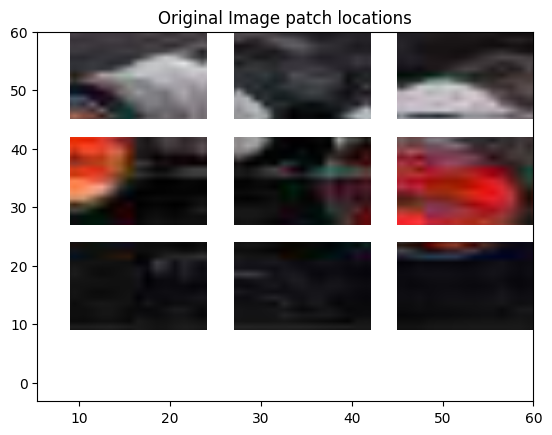

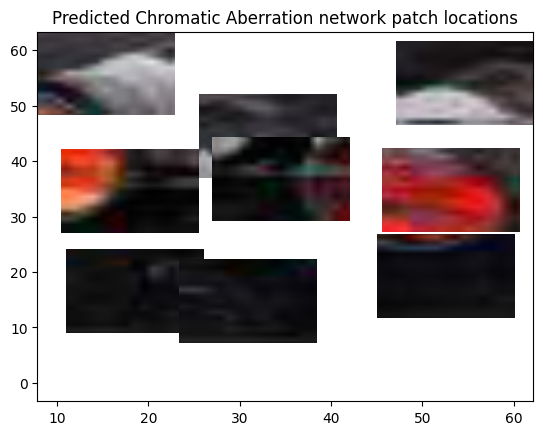

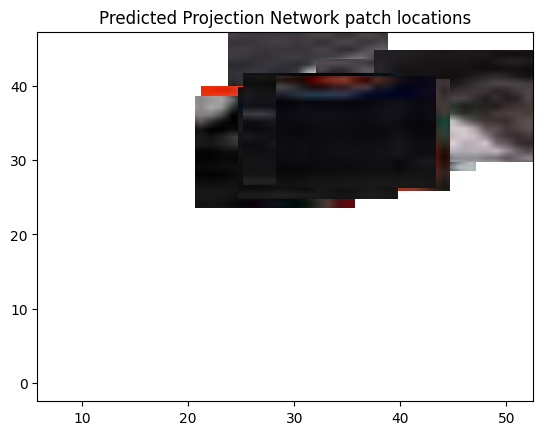

In [ ]:
display_canvas(convert_format(p_b, format='n'), coor, title='Original Image patch locations')

display_canvas(convert_format(p_b, format='n'), coor_can.cpu().detach().numpy(), title='Predicted Chromatic Aberration network patch locations')

display_canvas(convert_format(p_b, format='n'), coor_proj.cpu().detach().numpy(), title='Predicted Projection Network patch locations')

#### Explaination for above figures:
>1. First image canvas contains the patches of the original image. Each patch is aligned to its original position (x, y - coordinate).

>2. Second image canvas contains the plotting of the patchs and their coordinates predicted from the **Chromatic Aberration Network (CAN)**. In this method color channels, are retained for training.

>3. Third image canvas contains the plotting of the patches and their coordinates predicted from the **Projection Network (PN)**.  In this, we dropped two color channels and replaced with gaussian noise (std ~1/100 of the std of the remaining channel).  

>4. Comparing the outputs of both CAN and PN, it can be clearly seen that there is an issue of color aberration in the training.   

>5. In the second image, the color channel is retained, due to which the model learned the color aberration instead of the semantics of the image. The model predicted the patches (x, y) coordinates almost correctly as compared to the original patch location.  

>6. In Projection Network we removed the channels, so CNN was not able to learn the real features of the patches. The prediction was greatly affected by removing the channels and ending up in the same (x, y) coordinate.  

>7. Due to this chromatic anomaly, the CNN doesn't learn the semantics of the image (Binocular Image) in patch wise learning, in lieu of it learned the chromatic aberration which is easier for CNN to learn that the semantics. 

# Summary

><p>While solving a real world problem, if we have ample amounts of labeled data available, then the easiest way out to solve the problem is a supervised learning approach. Retrospecting the past decade or so, though supervised learning approaches have shown promising results, it is highly likely that either we don’t have labeled data available or the cost of labeled data is too high. To tackle this labeled data unavailability, we can resort to another approach called as unsupervised learning which aims on using the unlabeled data for performing the task. Despite that, unsupervised methods have not been up to the mark in terms of performance. After all, without labels, it is not even clear what to represent. If we improvise and design the model in such a way that capturing the representation is encouraged, our model will become better.</p>

><p> Moreover, whenever possible, we should try to train the network using a pre-trained model and then later fine tune it. If it works and we don’t have to train from the scratch, this will help us in many ways by helping us converge faster, providing better results, requiring less amount of data for training. But the problem with this approach is that we don't have pre-trained models for each and every domain. We can either use the first few layers of a model trained on some other domain or we can use data in such a way that the labels become part of the dataset. This is where the “pretext task” plays an important role.

>**In our work, we aim to provide a self-supervised formulation by predicting the context of patch as a “pretext task”.** We sample a random pair of patches from 9 patches of an image and try to predict the position of one patch with respect to the other one. This pretext task will help our model understand the features well which can be used to solve other real world problems.  

><p> The first task includes handling the dataset where we transform it into a form where it is operable by the model directly. We manipulated the dataset in a way that the model does not seek trivial solutions but rather try to learn the true feature space. Then we presented a ConvNet based architecture for pair classification and trained our model on a mini-ImageNet dataset. This network will learn to predict the context of patches of image with respect to one another. To check whether the network learns accurately, we tested it on a nearest neighbour approach. Due to chromatic aberration, our network was not able to bring true nearest neighbours. We tackled the problem by training the network to predict the absolute coordinates of patches sampled from the dataset.</p>

><p>The experimentation results showed that the nearest neighbour approach was able to provide visually similar representations as the network was able to learn the semantics properly. Earlier it tried to learn the chromatic aberration instead of learning the true semantics of an image. We avoided this by dropping color channels 2 and 3 and replacing it with gaussian noise (std ~1/100 of the std of the remaining channel).</p>

# References

<p>[1] A. Krizhevsky, I. Sutskever, and G. Hinton. Imagenet classification with deep convolutional neural networks. In NIPS, 2012.
<p>[2] Y. Chen, W. Li, C. Sakaridis, D. Dai, and L. Van Gool. Domain adaptive faster R-CNN for object detection in the wild. In Conference on Computer Vision and Pattern Recognition(CVPR), 2018.
<p>[3] D. Dai and L. Van Gool. Dark model adaptation: Semantic image segmentation from daytime to nighttime. arXiv preprint arXiv: 1810.02575, 2018.
<p>[4] R.K. Ando and T. Zhang. A framework for learning predictive structures from multiple tasks and unlabeled data. JMLR, 2005.
<p>[5] R. Collobert and J. Weston. A unified architecture for natural language processing: Deep neural networks with multitask learning.  In ICML, 2008.
<p>[6] T. Mikolov, I. Sutskever, K. Chen, G.S. Corrado, and J. Dean.  Distributed representations of words and phrases and their compositionality. In NIPS, 2013.
<p>[7] D. Okanohara and J. Tsujii.  A discriminative language model with pseudo negative samples. In ACL, 2007.
<p>[8] F. Ebert, S. Dasari, A.X. Lee, S. Levine, and C.  Finn. Robustness via retrying:  Closed-loop robotic manipulation with self-supervised learning. Conference on Robot Learning (CoRL), 2018.
<p>[9] E. Jang, C. Devin, V. Vanhoucke, and S. Levine. Grasp2Vec: Learning object representations from self-supervised grasping. In Conference on Robot Learning, 2018.
<p>[10] M. A. Lee, Y. Zhu, K. Srinivasan, P. Shah, S. Savarese, L.  Fei-Fei, A. Garg, and J.  Bohg. Making sense of vision and touch: Self-supervised learning of multi modal representations for   contact rich   tasks. arXiv preprint arXiv: 1810.10191, 2018.
<p>[11] P. Sermanet, C. Lynch, Y. Chebotar, J. Hsu, E. Jang, S. Schaal,   and S. Levine. Time contrastive networks: Self-supervised learning   from video. arXiv preprint arXiv: 1704.06888, 2017.
<p>[12] A. Owens and A.A. Efros. Audio-visual scene analysis with self-supervised multisensory features. European Conference on Computer Vision (ECCV), 2018.
<p>[13] N. Sayed, B. Brattoli, and B. Ommer. Cross and learn: Cross modal   self-supervision. arXiv preprint arXiv: 1811.03879, 2018.
<p>[14] B. Korbar, D. Tran, and L. Torresani. Cooperative learning of audio and video models from self-supervised synchronization. arXiv preprint arXiv:1807.00230, 2018.
<p>[15] G. Hinton, S. Osindero, and Y.W. Teh. A fast learning algorithm for deep belief nets. Neural computation, 2006.
<p>[16] R. Salakhutdinov and G.E. Hinton. Deep boltzmann machines. In ICAIS, 2009.
<p>[17] G.E. Hinton, P. Dayan, B.J. Frey, and R.M. Neal.  The “wake sleep” algorithm for unsupervised neural  networks. Proceedings. IEEE, 1995.
<p>[18] D.P. Kingma and M. Welling. Auto encoding variational bayes. 2014.
<p>[19] D.J. Rezende, S. Mohamed, and D. Wierstra. Stochastic backpropagation and approximate inference in deep generative models. ICML, 2014.
<p>[20] Y. Bengio, E. Thibodeau Laufer, G. Alain, and J. Yosinski. Deep generative stochastic networks trainable by backprop. ICML, 2014.
<p>[21] P. Vincent, H. Larochelle, Y. Bengio, and P.A. Manzagol.  Extracting and composing robust features with denoising autoencoders. In ICML, 2008.
<p>[22] Q.V. Le. Building high-level features using large scale unsupervised learning. In ICASSP, 2013.
<p>[23] H. Lee, A. Battle, R. Raina, and A.Y. Ng. Efficient sparse coding algorithms. In NIPS, 2006.
<p>[24] C. Doersch, A. Gupta, and A.A. Efros. Context as supervisory signal:  Discovering objects with predictable context.  In ECCV. 2014.
<p>[25] J. Domke, A. Karapurkar, and Y. Aloimonos. Who killed the directed model?  In CVPR, 2008.
<p>[26] H. Larochelle and I. Murray. The neural autoregressive distribution estimator. In AISTATS, 2011.
<p>[27] L. Theis and M. Bethge. Generative image modeling using spatial lstms. In NIPS, 2015.
<p>[28] T. Malisiewicz and A. Efros. Beyond categories: The visual memex model for reasoning about object relationships. In NIPS, 2009.
